# Dataset & Library Import

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv

from itertools import cycle
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, label_binarize, OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.datasets import load_digits
# Machine Learning model imports
from sklearn.linear_model import (LinearRegression,LogisticRegression)
from sklearn.model_selection import (
    train_test_split, GridSearchCV, RandomizedSearchCV
)
from sklearn.ensemble import (
    RandomForestClassifier, VotingClassifier, GradientBoostingClassifier, BaggingClassifier)
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    classification_report, ConfusionMatrixDisplay,confusion_matrix, accuracy_score,
    f1_score,roc_curve, auc
)

# Nerual Networks
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

np.random.seed(42)
tf.random.set_seed(42)

In [53]:
loc = "/content/drive/MyDrive/ML/movie_ratings_dataset.csv"
df = pd.read_csv(loc)
df.head(5)

,Genre,Director_Popularity,Budget_MillionUSD,Runtime_Minutes,Release_Year,Num_Main_Actors,Avg_Actor_Popularity,Has_Famous_Producer,Num_Awards_Won,Marketing_Spend_MillionUSD,Is_Sequel,Rating_Category
0,Sci-Fi,5.80,134.63,141.0,NaN,1.0,2.72,No,9.0,25.48,No,Excellent
1,Action,2.27,220.47,98.0,2006.0,1.0,3.46,Yes,17.0,9.13,Yes,Excellent
2,Horror,1.23,52.79,160.0,2010.0,2.0,NaN,NaN,43.0,6.16,No,Excellent
3,Action,8.17,86.41,153.0,2022.0,4.0,5.21,NaN,7.0,2.99,No,Good
4,Romance,6.40,259.57,134.0,1986.0,1.0,8.72,Yes,25.0,0.89,No,Excellent


# Exploratory Data Analysis

In [5]:
print("\nDataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())


Dataset Shape: (1200, 12)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Genre                       1071 non-null   object 
 1   Director_Popularity         1067 non-null   float64
 2   Budget_MillionUSD           1096 non-null   float64
 3   Runtime_Minutes             1074 non-null   float64
 4   Release_Year                1088 non-null   float64
 5   Num_Main_Actors             1075 non-null   float64
 6   Avg_Actor_Popularity        1066 non-null   float64
 7   Has_Famous_Producer         1071 non-null   object 
 8   Num_Awards_Won              1061 non-null   float64
 9   Marketing_Spend_MillionUSD  1089 non-null   float64
 10  Is_Sequel                   1083 non-null   object 
 11  Rating_Category             1200 non-null   object 
dtypes: float64(8), object(4)
memory usage: 112.6+ KB

In [6]:
print("\nBasic statistical summary:")
print(df.describe())


Basic statistical summary:
       Director_Popularity  Budget_MillionUSD  Runtime_Minutes  Release_Year  \
count          1067.000000        1096.000000      1074.000000   1088.000000   
mean              5.452624         152.768723       129.401304   2002.330882   
std               2.600397          85.998943        28.744659     13.068670   
min               1.010000           1.040000        80.000000   1980.000000   
25%               3.310000          78.857500       103.000000   1991.000000   
50%               5.400000         156.060000       130.000000   2002.000000   
75%               7.690000         226.017500       154.000000   2014.000000   
max              10.000000         299.730000       179.000000   2024.000000   

       Num_Main_Actors  Avg_Actor_Popularity  Num_Awards_Won  \
count      1075.000000           1066.000000     1061.000000   
mean          2.531163              5.495159       24.113101   
std           1.143236              2.620555       14.46415

In [7]:
df.dtypes

,0
Genre,object
Director_Popularity,float64
Budget_MillionUSD,float64
Runtime_Minutes,float64
Release_Year,float64
Num_Main_Actors,float64
Avg_Actor_Popularity,float64
Has_Famous_Producer,object
Num_Awards_Won,float64
Marketing_Spend_MillionUSD,float64


In [8]:
df.nunique()

,0
Genre,6
Director_Popularity,626
Budget_MillionUSD,1079
Runtime_Minutes,100
Release_Year,45
Num_Main_Actors,4
Avg_Actor_Popularity,629
Has_Famous_Producer,2
Num_Awards_Won,50
Marketing_Spend_MillionUSD,956


In [9]:
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 0


In [10]:
numerical_data = df.select_dtypes(include='number')
numerical_features=numerical_data.columns.tolist()

print(f'There are {len(numerical_features)} numerical features:', '\n')
print(numerical_features)

There are 8 numerical features: 

['Director_Popularity', 'Budget_MillionUSD', 'Runtime_Minutes', 'Release_Year', 'Num_Main_Actors', 'Avg_Actor_Popularity', 'Num_Awards_Won', 'Marketing_Spend_MillionUSD']


In [11]:
categorical_data = df.select_dtypes(include= 'object')
categorical_features=categorical_data.columns.tolist()

print(f'There are {len(categorical_features)} numerical features:', '\n')
print(categorical_features)

There are 4 numerical features: 

['Genre', 'Has_Famous_Producer', 'Is_Sequel', 'Rating_Category']



Missing Values Information:
                        Column  Missing Values  Percentage (%)
8               Num_Awards_Won             139       11.583333
6         Avg_Actor_Popularity             134       11.166667
1          Director_Popularity             133       11.083333
7          Has_Famous_Producer             129       10.750000
0                        Genre             129       10.750000
3              Runtime_Minutes             126       10.500000
5              Num_Main_Actors             125       10.416667
10                   Is_Sequel             117        9.750000
4                 Release_Year             112        9.333333
9   Marketing_Spend_MillionUSD             111        9.250000
2            Budget_MillionUSD             104        8.666667


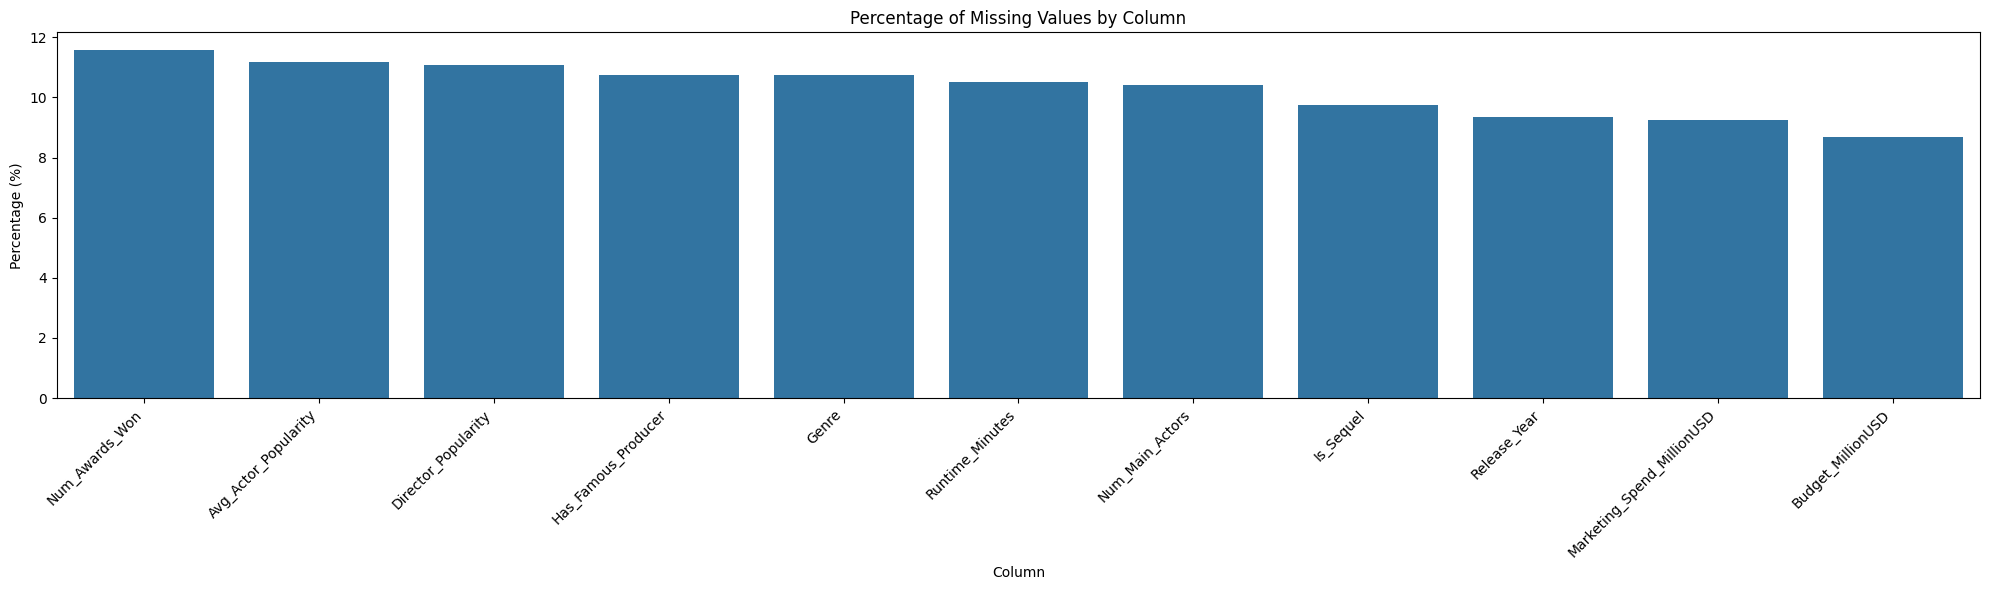

In [12]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Values': missing_values.values,
    'Percentage (%)': missing_percentage.values
})

missing_df = missing_df[missing_df['Missing Values'] > 0].sort_values('Missing Values', ascending=False)

print("\nMissing Values Information:")
print(missing_df)

if not missing_df.empty:
    plt.figure(figsize=(20, 6))
    sns.barplot(x='Column', y='Percentage (%)', data=missing_df)
    plt.xticks(rotation=45, ha='right')
    plt.title('Percentage of Missing Values by Column')
    plt.tight_layout()
    plt.show()
else:
    print("\nNo missing values found in the DataFrame.")

In [13]:
print("\nChecking for outliers in numerical columns:")
numeric_cols = df.select_dtypes(include=['float', 'int']).columns
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Column '{col}' has {len(outliers)} outliers")


Checking for outliers in numerical columns:
Column 'Director_Popularity' has 0 outliers
Column 'Budget_MillionUSD' has 0 outliers
Column 'Runtime_Minutes' has 0 outliers
Column 'Release_Year' has 0 outliers
Column 'Num_Main_Actors' has 0 outliers
Column 'Avg_Actor_Popularity' has 0 outliers
Column 'Num_Awards_Won' has 0 outliers
Column 'Marketing_Spend_MillionUSD' has 0 outliers


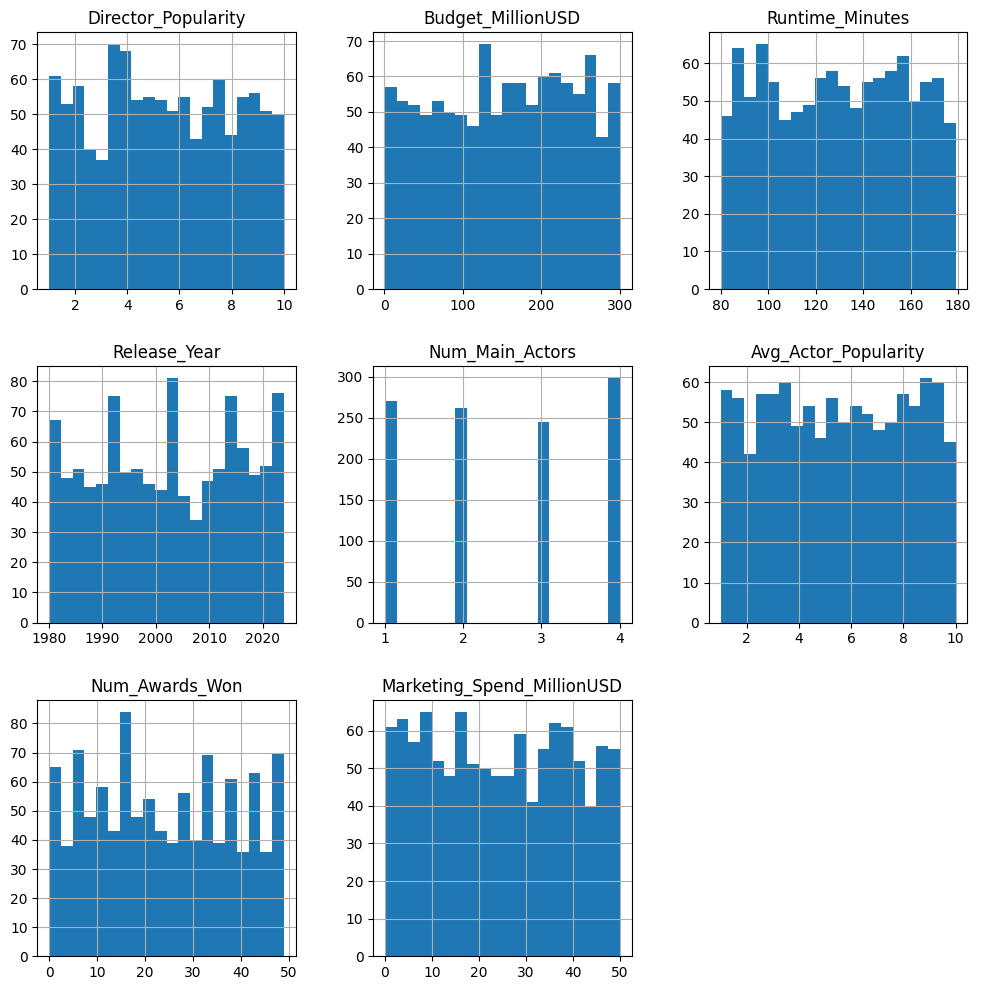

In [14]:
numerical_data.hist(figsize=(12,12),bins=20)
plt.show()

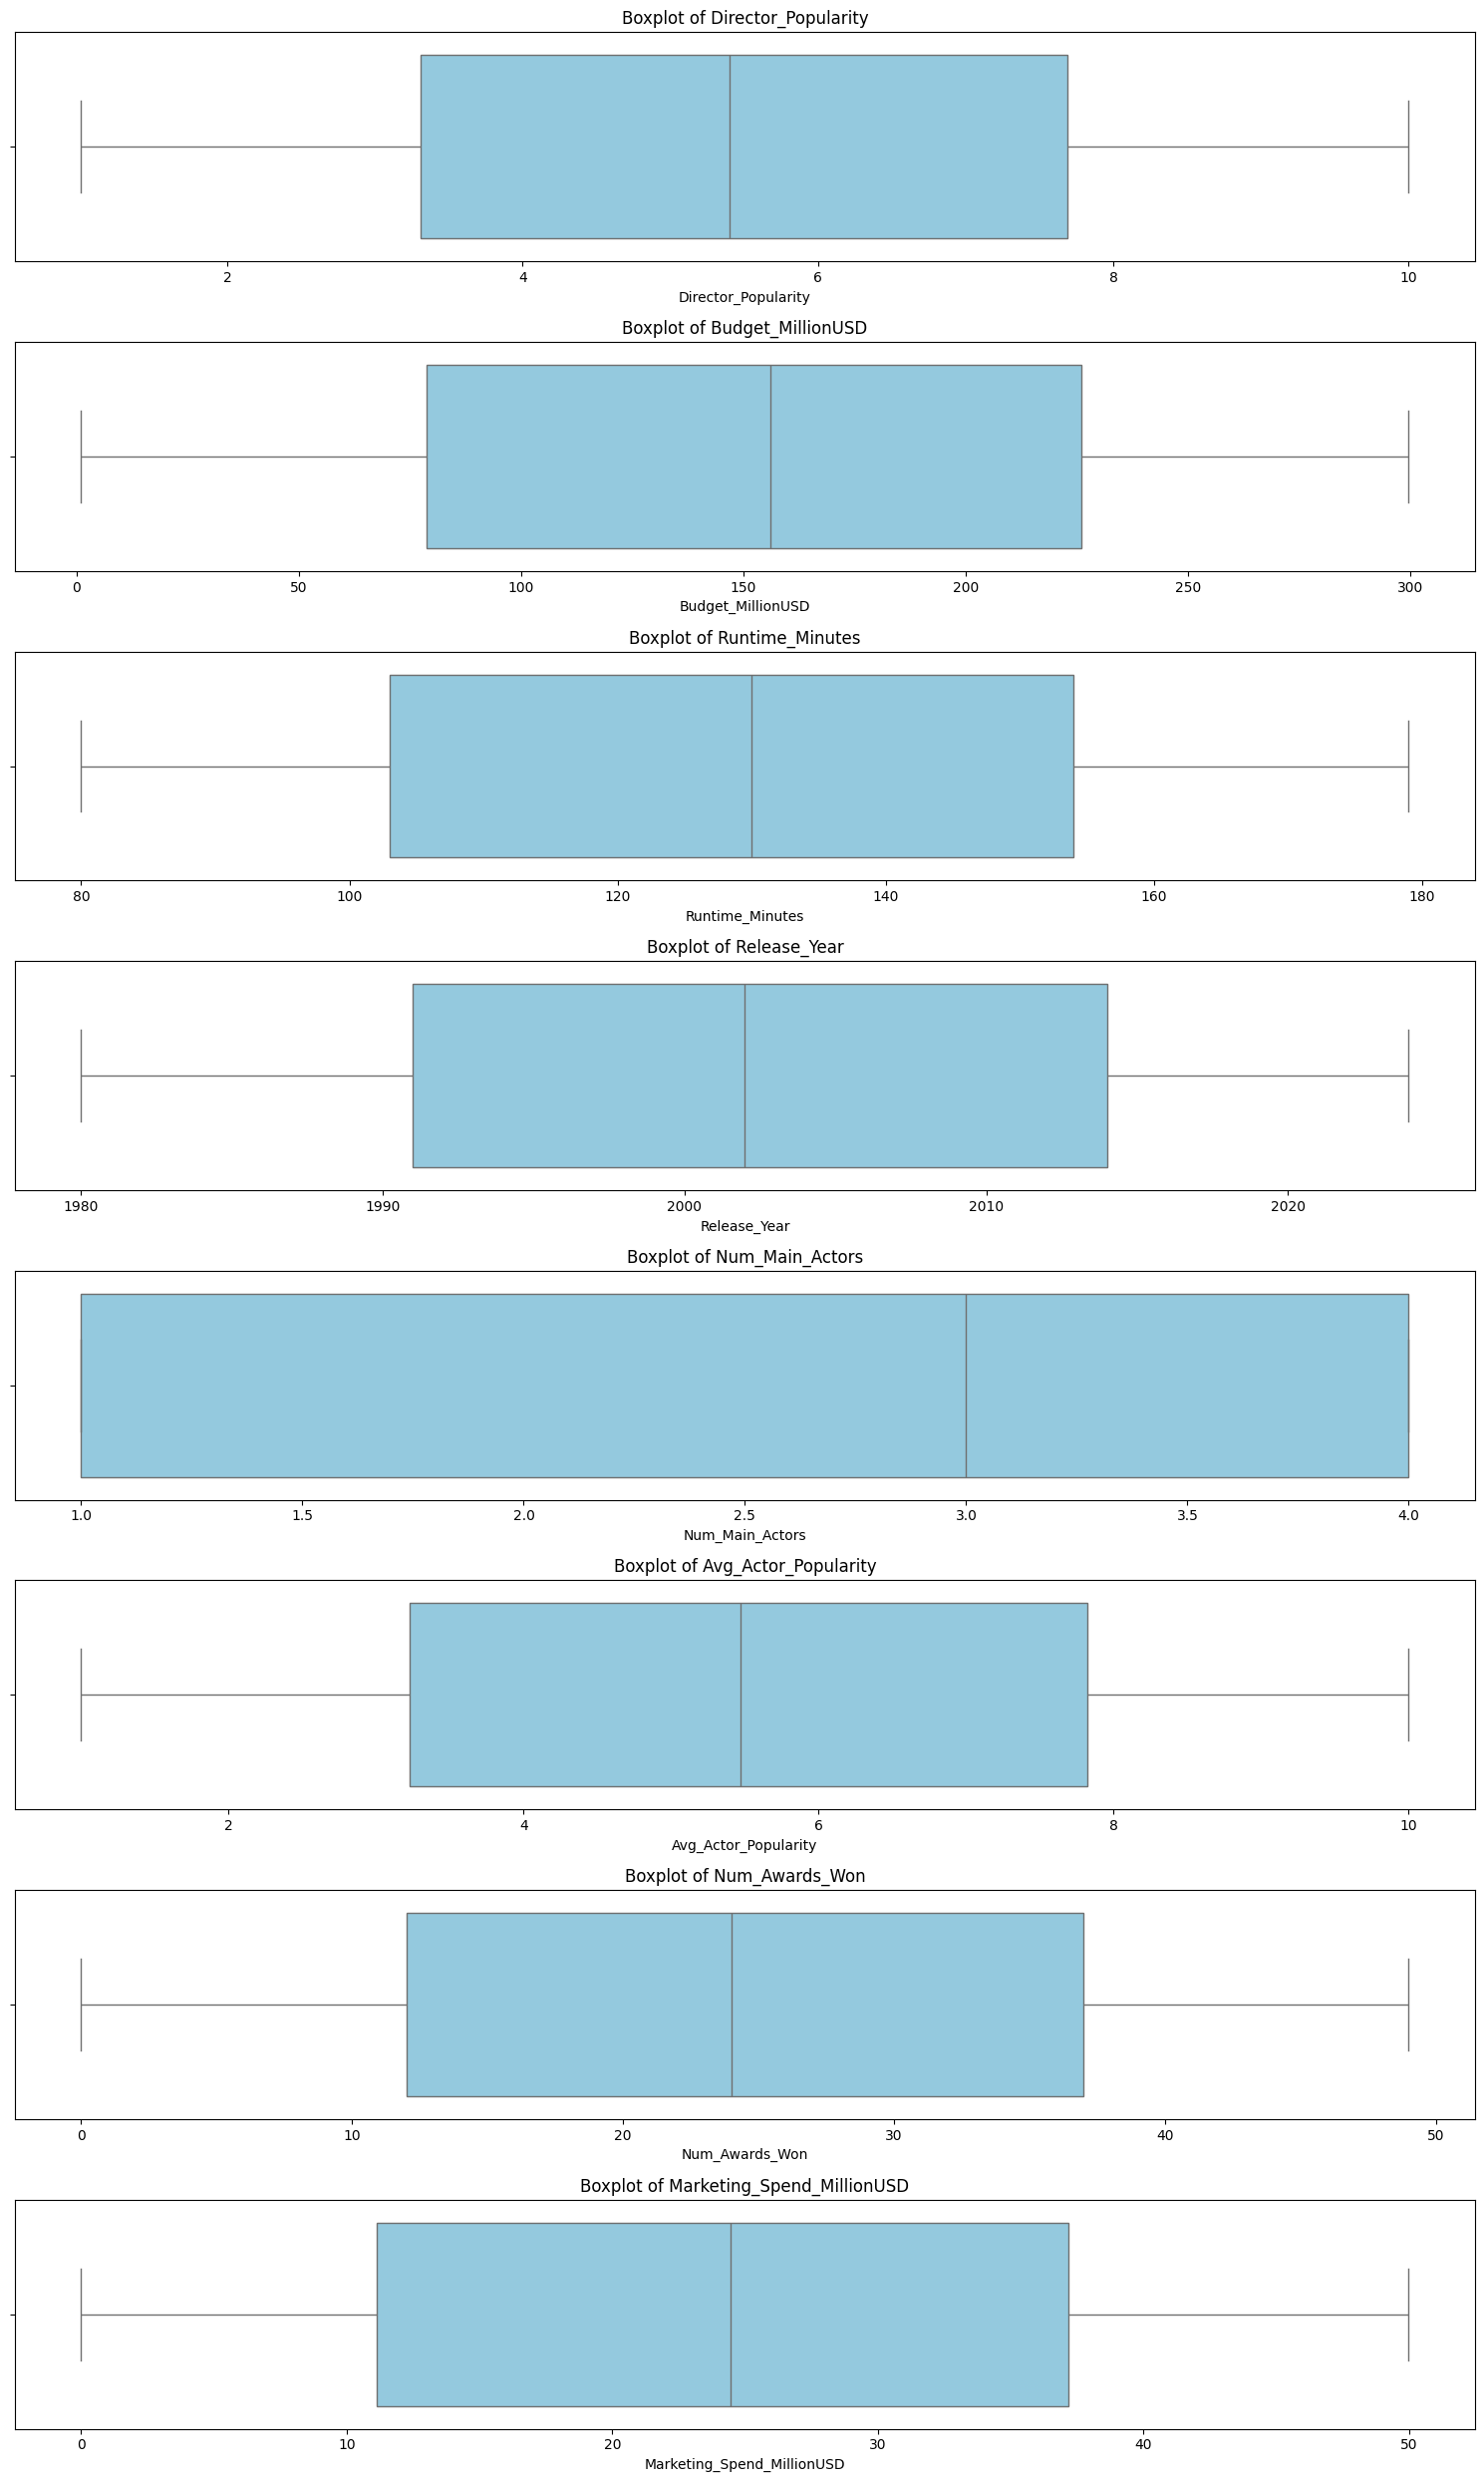

In [15]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(15, 25))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}', fontsize=12)
    plt.tight_layout()

plt.show()

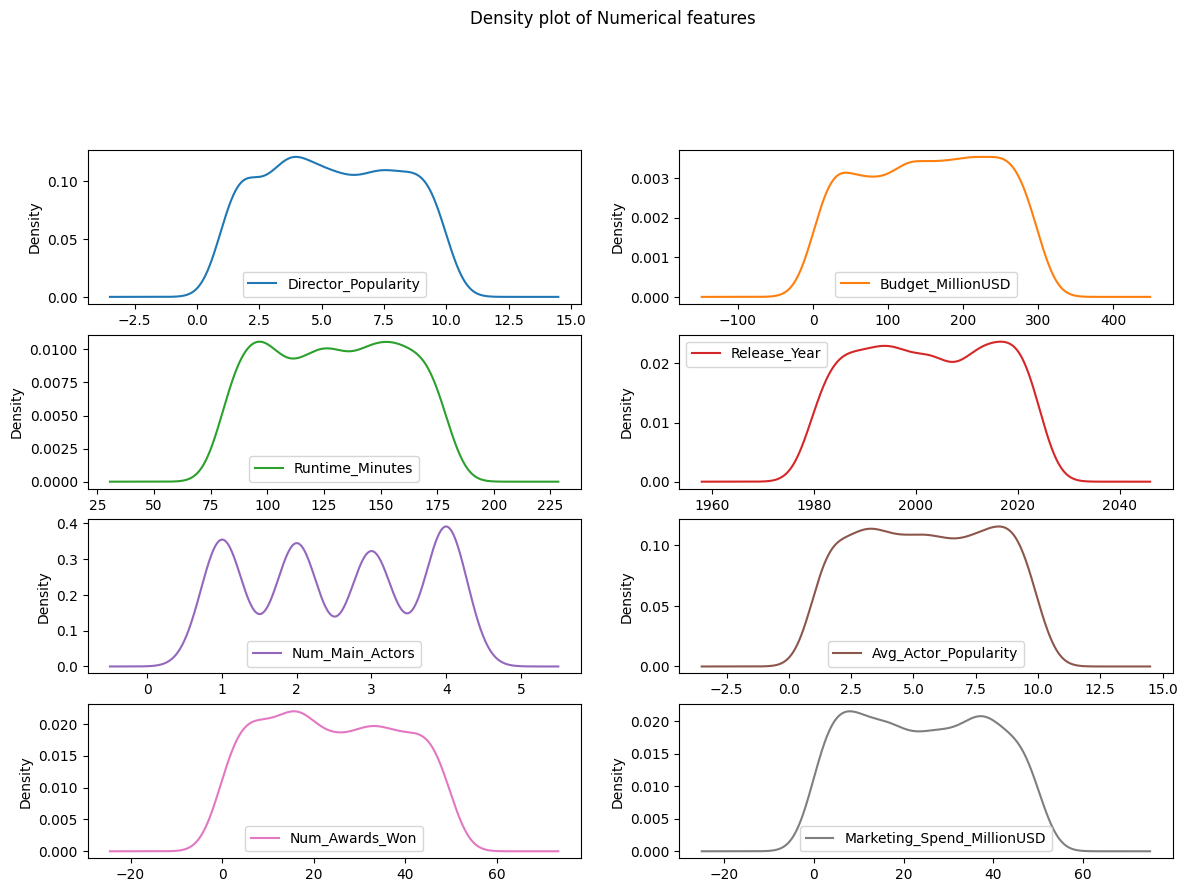

In [16]:
numerical_data.plot(kind='density',figsize=(14,14),subplots=True,layout=(6,2),title="Density plot of Numerical features",sharex=False)
plt.show()

 TARGET VARIABLE ANALYSIS
Rating Category Distribution:
                 Count  Percentage (%)
Rating_Category                       
Good               324           27.00
Excellent          304           25.33
Average            294           24.50
Poor               278           23.17


Text(0, 0.5, 'Count')

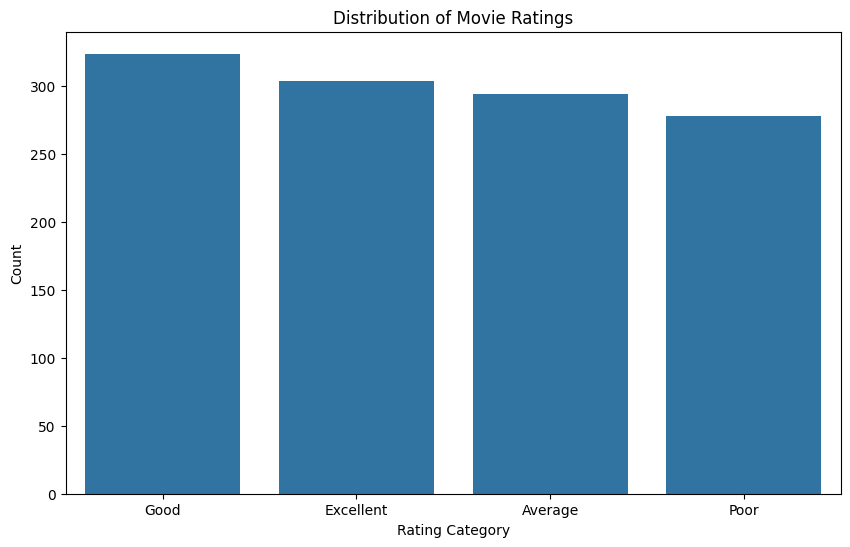

In [17]:
print(" TARGET VARIABLE ANALYSIS")
target_counts = df['Rating_Category'].value_counts()
target_percentage = (target_counts / len(df)) * 100
print("Rating Category Distribution:")
target_df = pd.DataFrame({
    'Count': target_counts,
    'Percentage (%)': target_percentage.round(2)
})
print(target_df)

plt.figure(figsize=(10, 6))
sns.countplot(x='Rating_Category', data=df, order=df['Rating_Category'].value_counts().index)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating Category')
plt.ylabel('Count')


Distribution of categorical variables:

Genre value counts:
Genre
Action     188
Horror     188
Comedy     178
Romance    176
Drama      172
Sci-Fi     169
Name: count, dtype: int64

Has_Famous_Producer value counts:
Has_Famous_Producer
No     553
Yes    518
Name: count, dtype: int64

Is_Sequel value counts:
Is_Sequel
Yes    554
No     529
Name: count, dtype: int64

Rating_Category value counts:
Rating_Category
Good         324
Excellent    304
Average      294
Poor         278
Name: count, dtype: int64


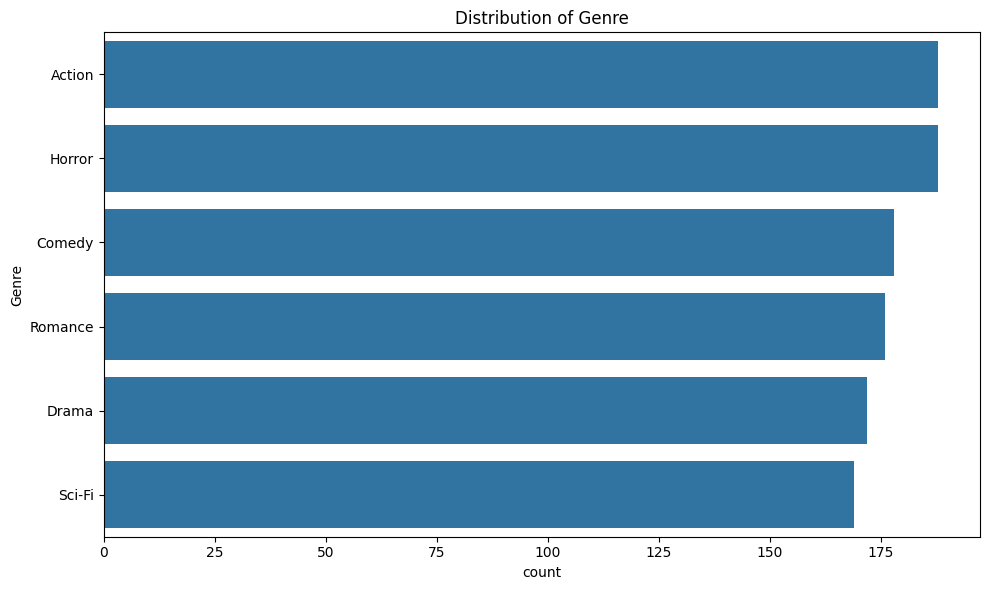

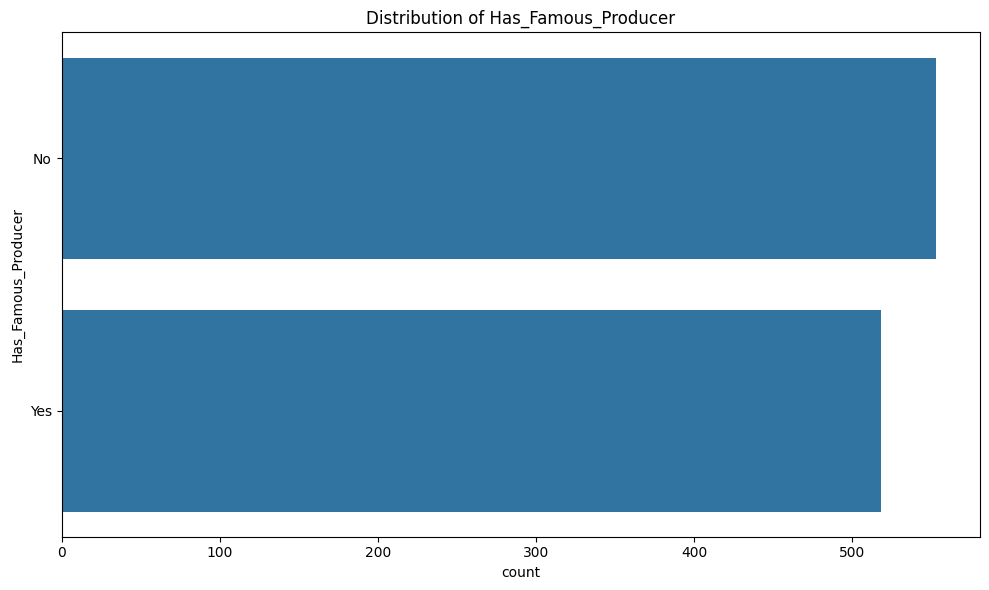

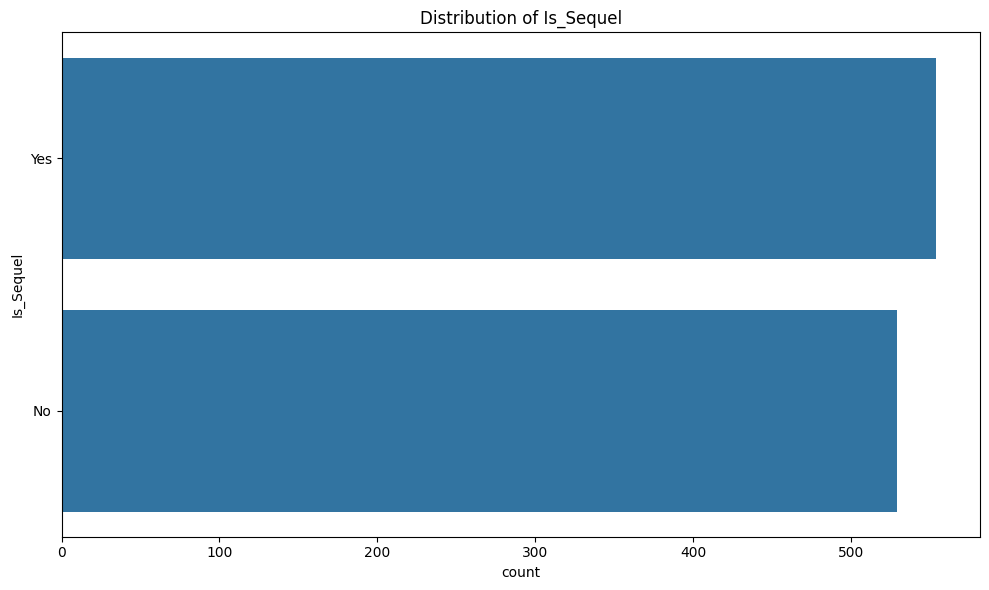

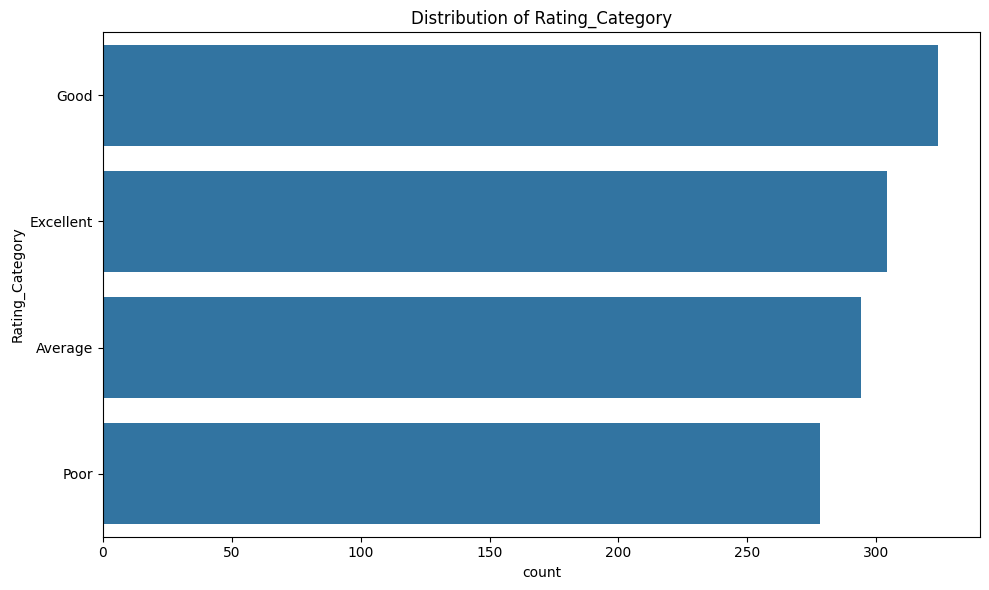

In [18]:
print("\nDistribution of categorical variables:")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col} value counts:")
    value_counts = df[col].value_counts()
    print(value_counts)

    plt.figure(figsize=(10, 6))
    sns.countplot(y=col, data=df, order=value_counts.index)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.savefig(f'{col}_distribution.png')


Distribution of numerical variables:


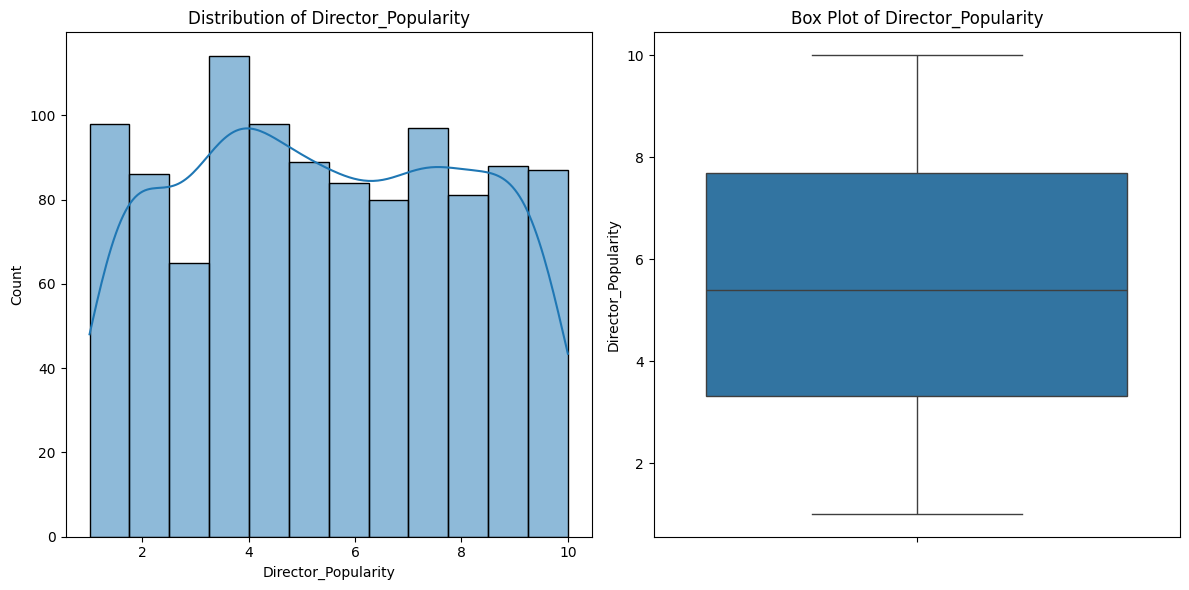

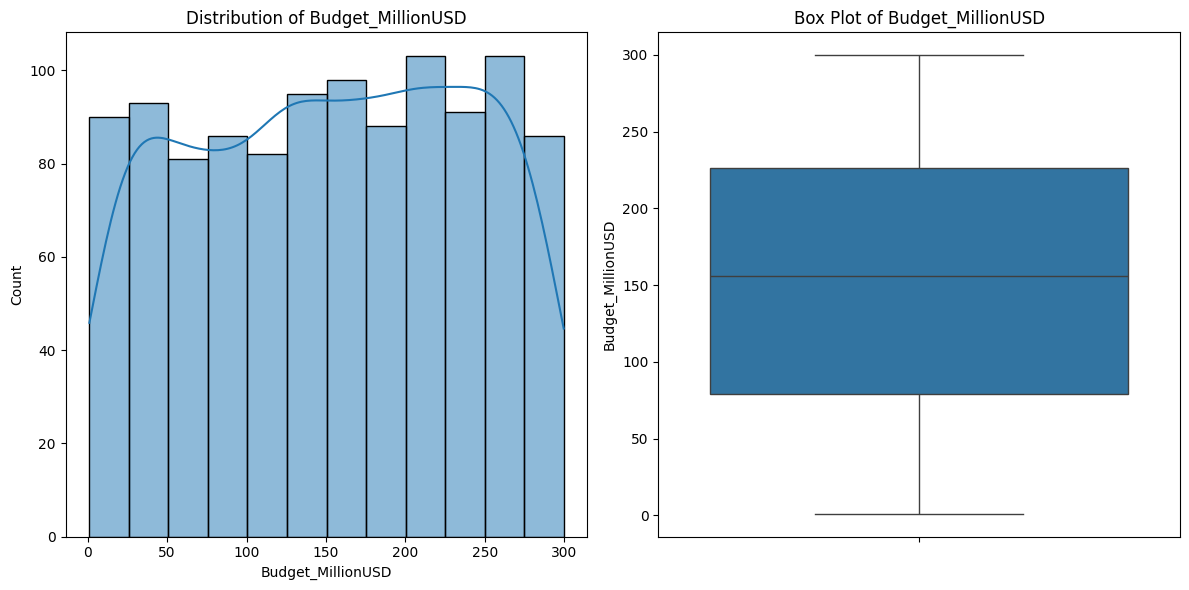

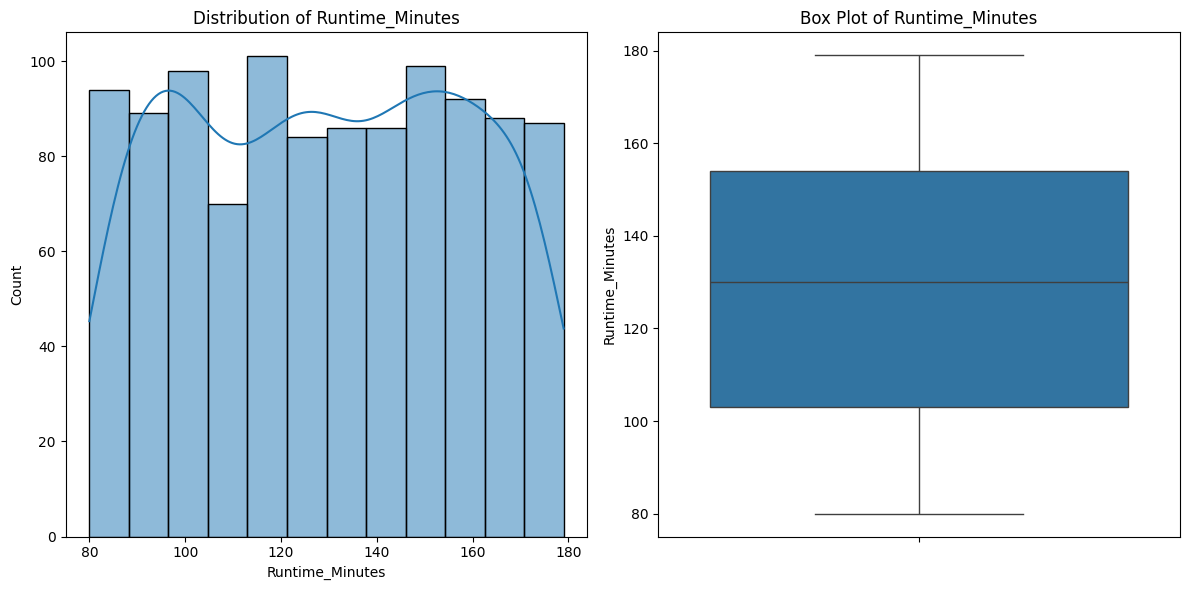

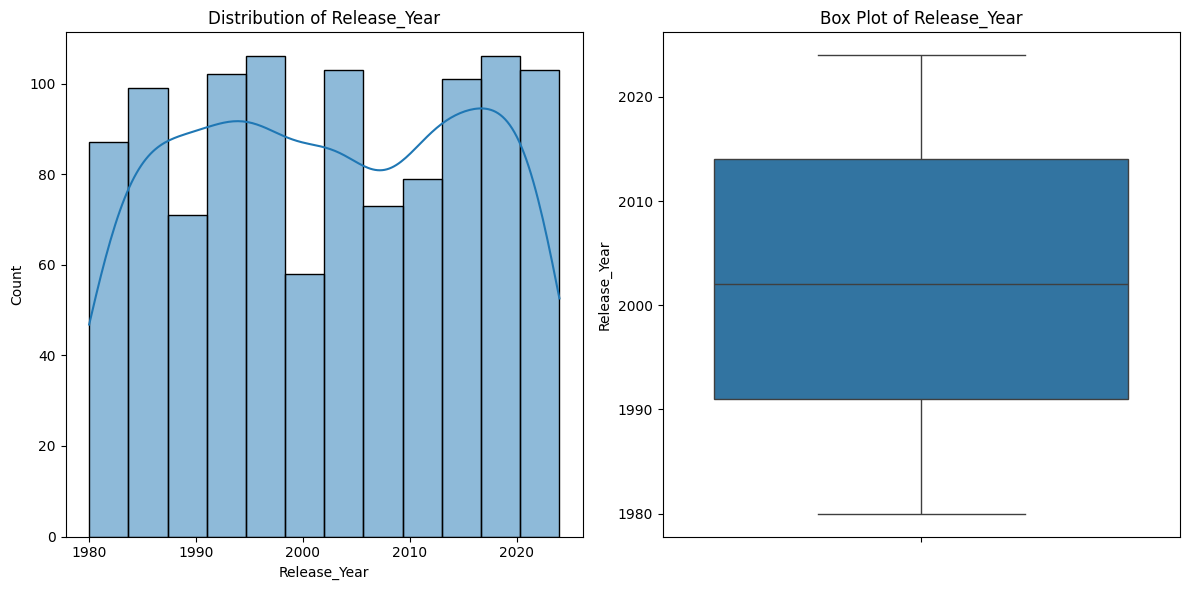

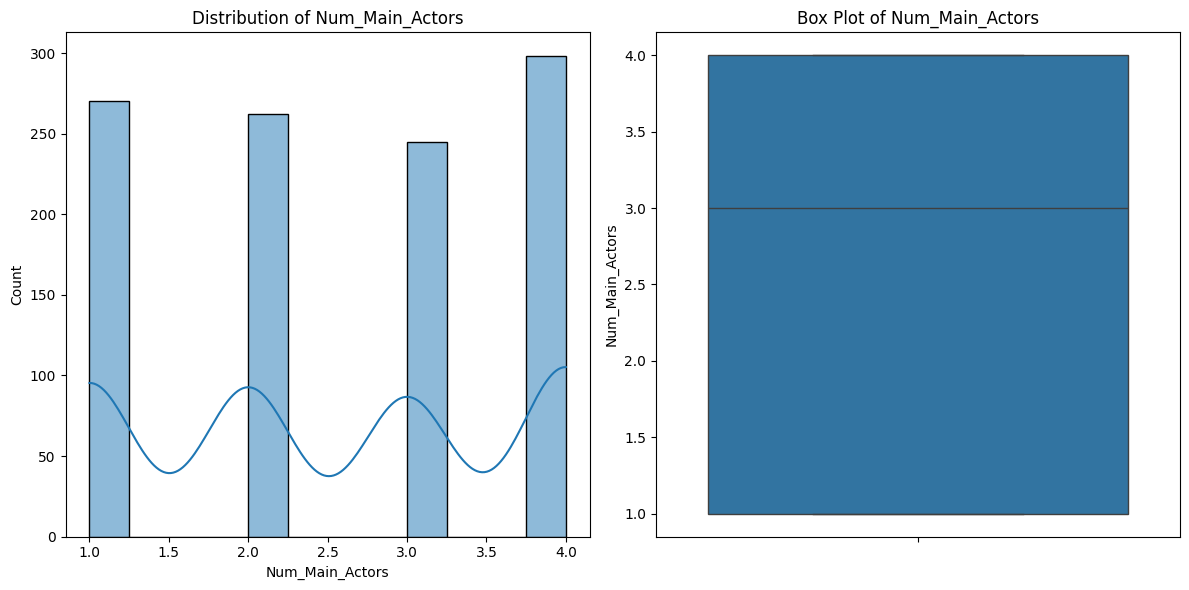

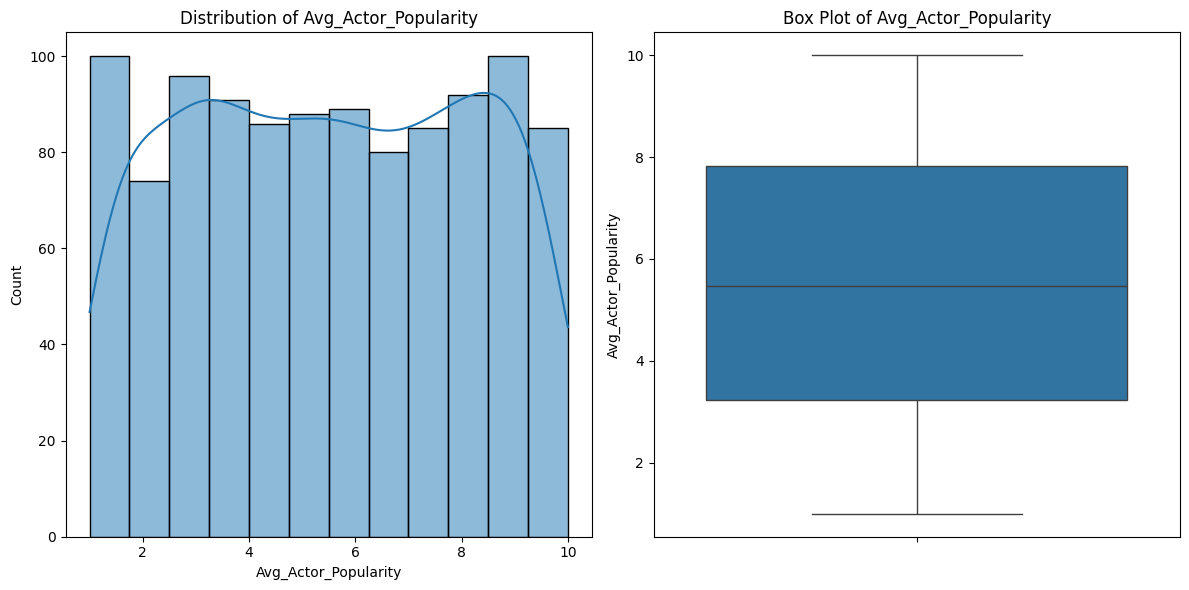

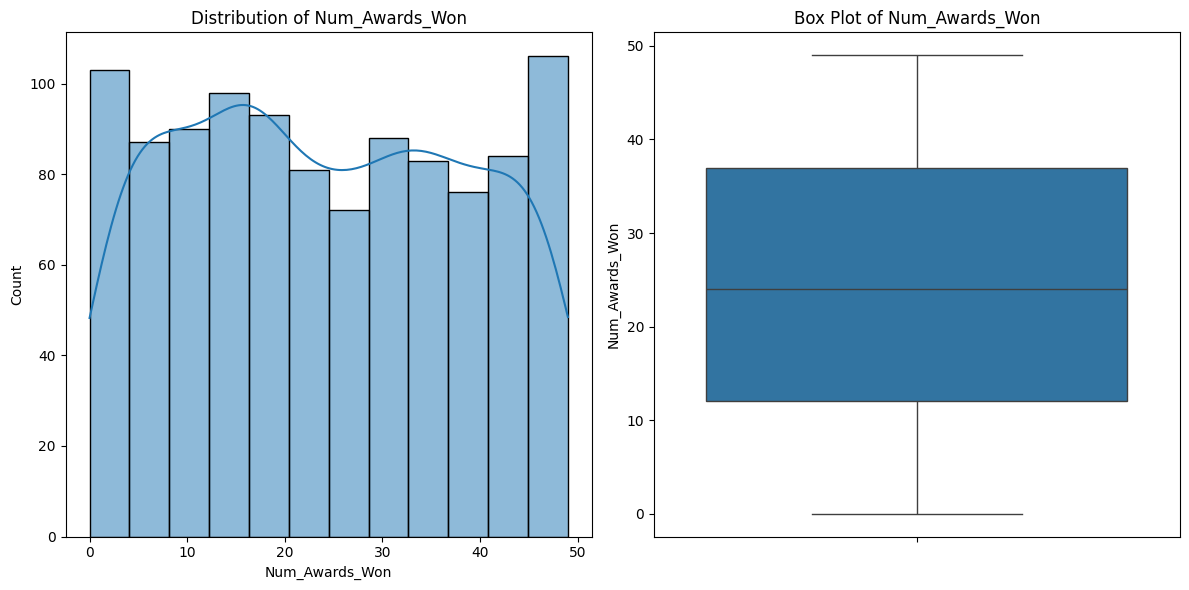

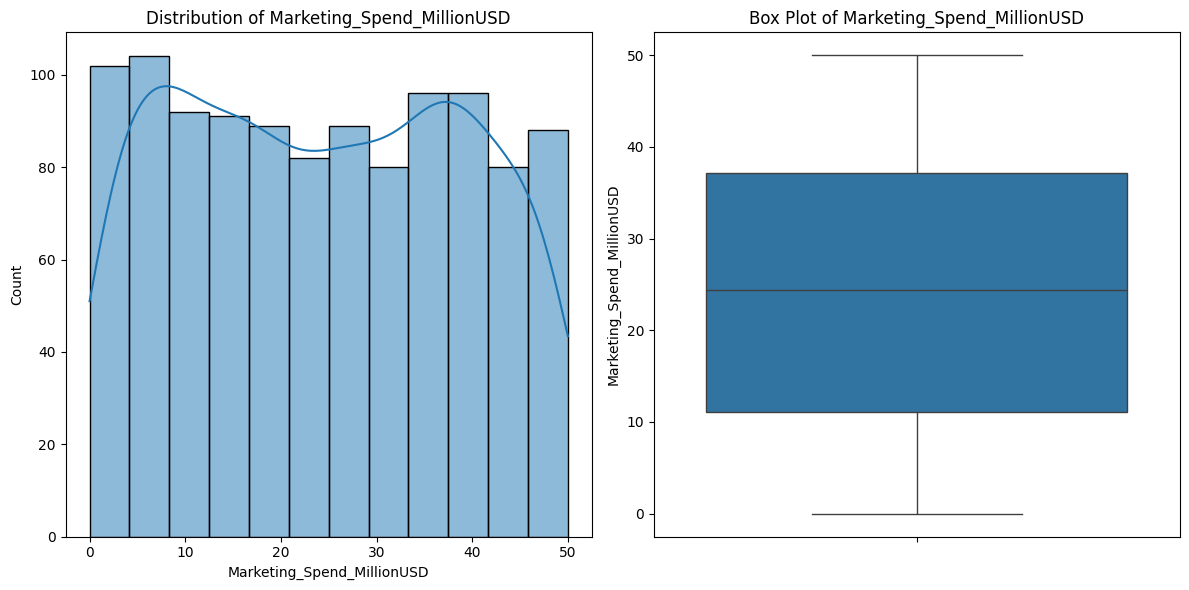

In [19]:
# Distribution of numerical variables
print("\nDistribution of numerical variables:")
for col in numeric_cols:
    plt.figure(figsize=(12, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')

    # Box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')

    plt.tight_layout()
    plt.savefig(f'{col}_distribution.png')


Analyzing relationship between categorical and target variables:


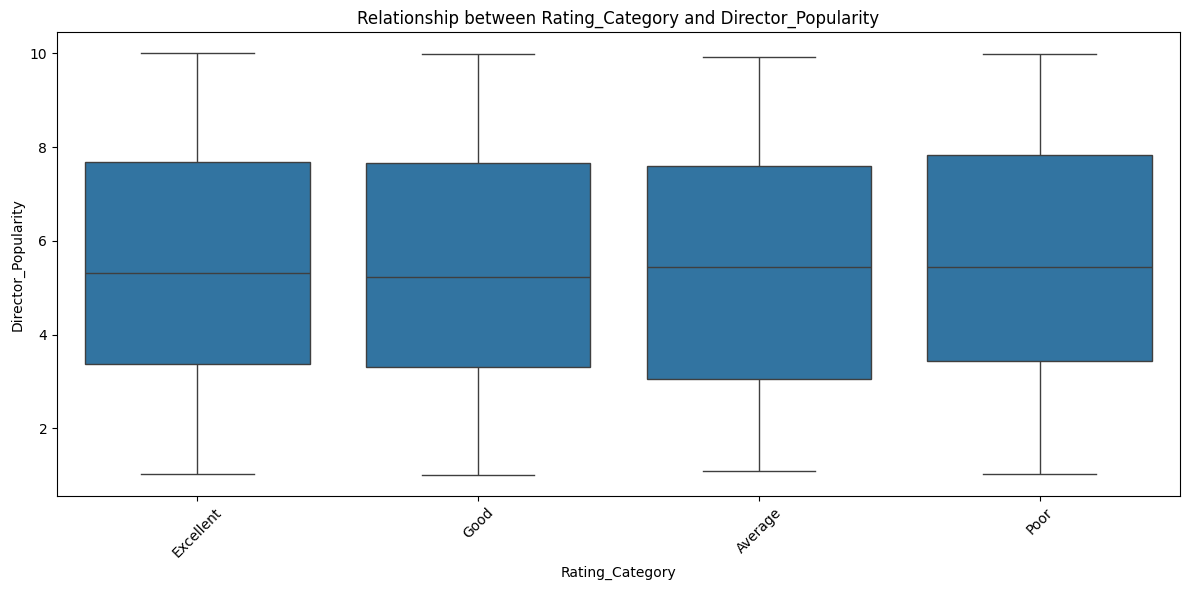

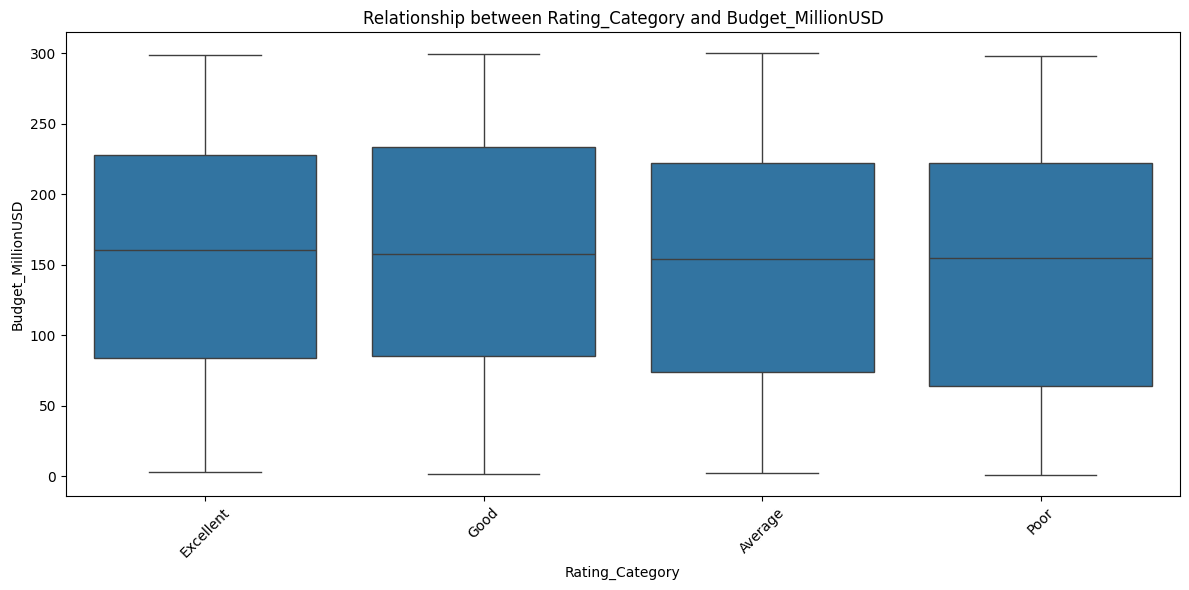

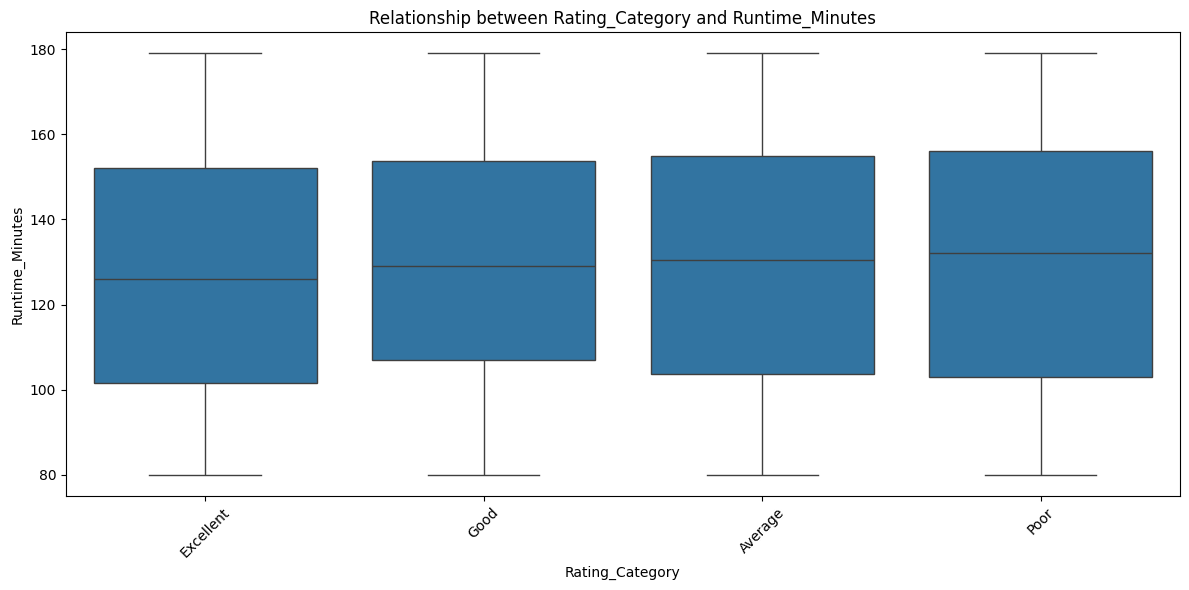

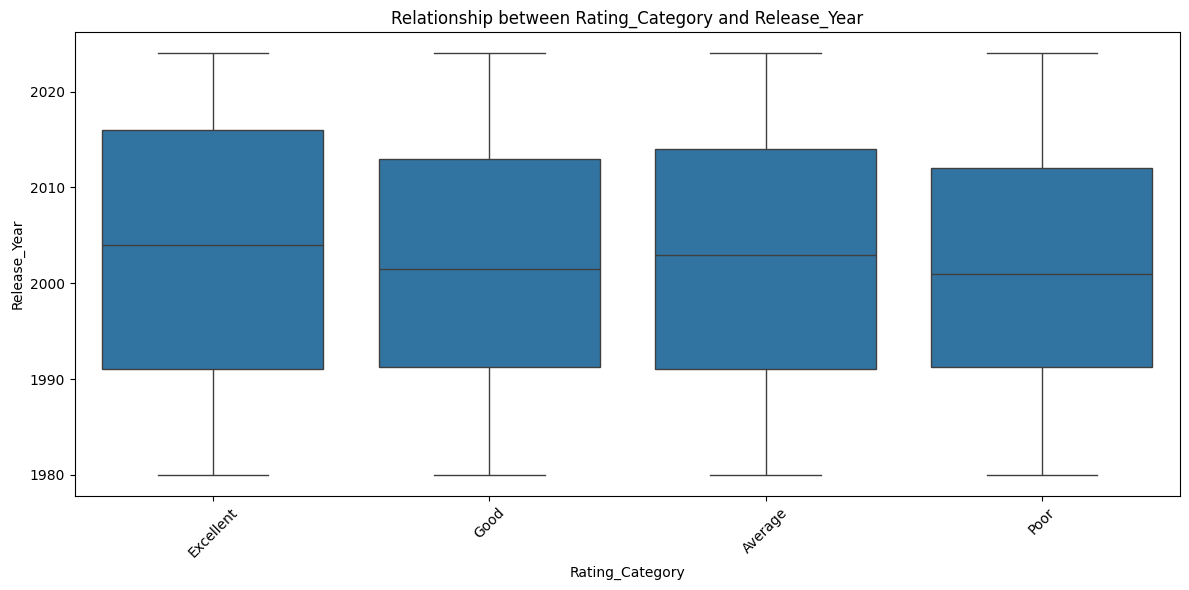

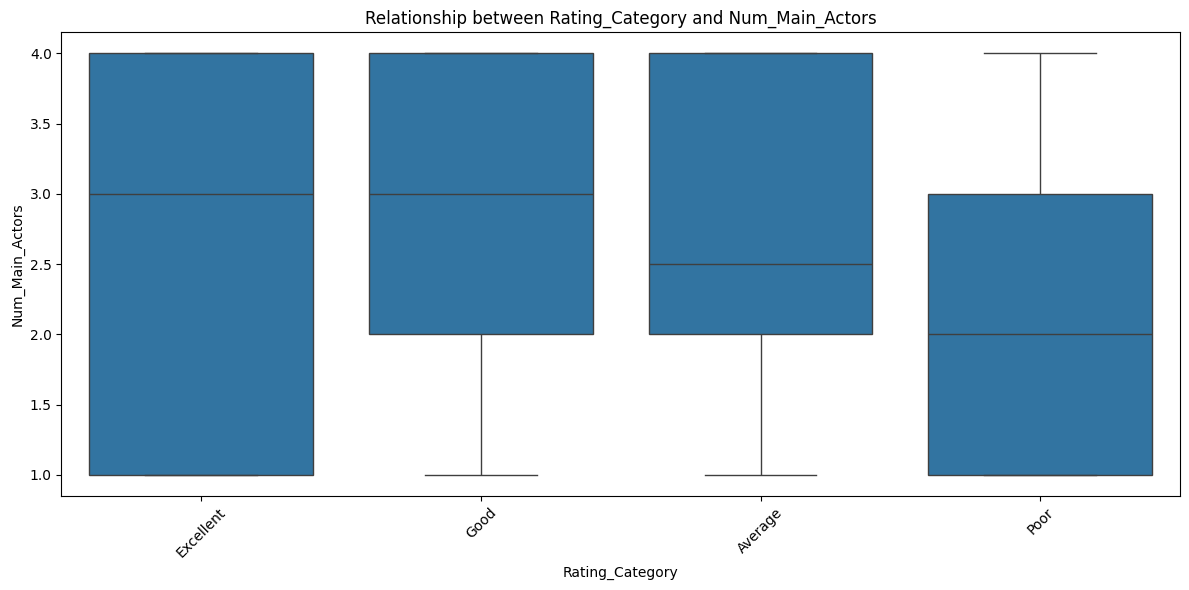

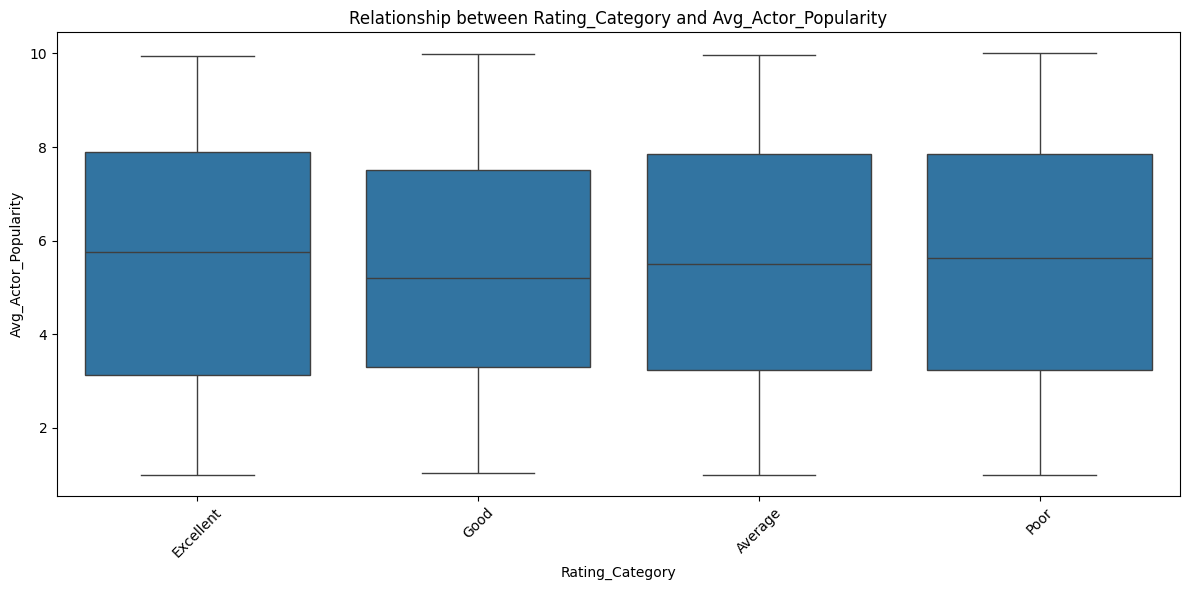

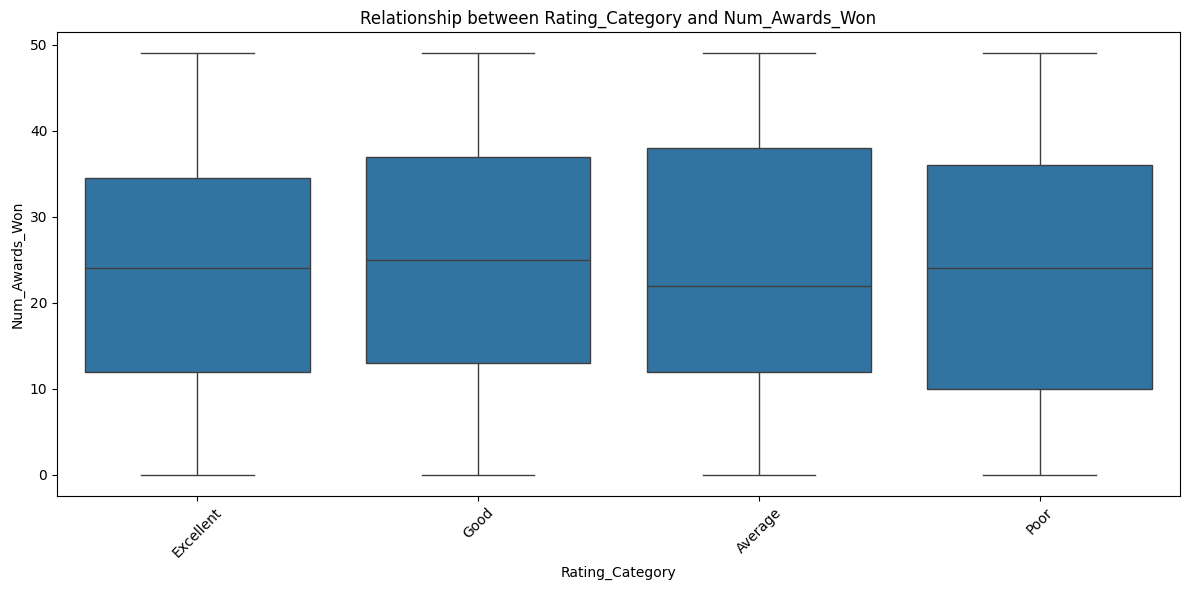

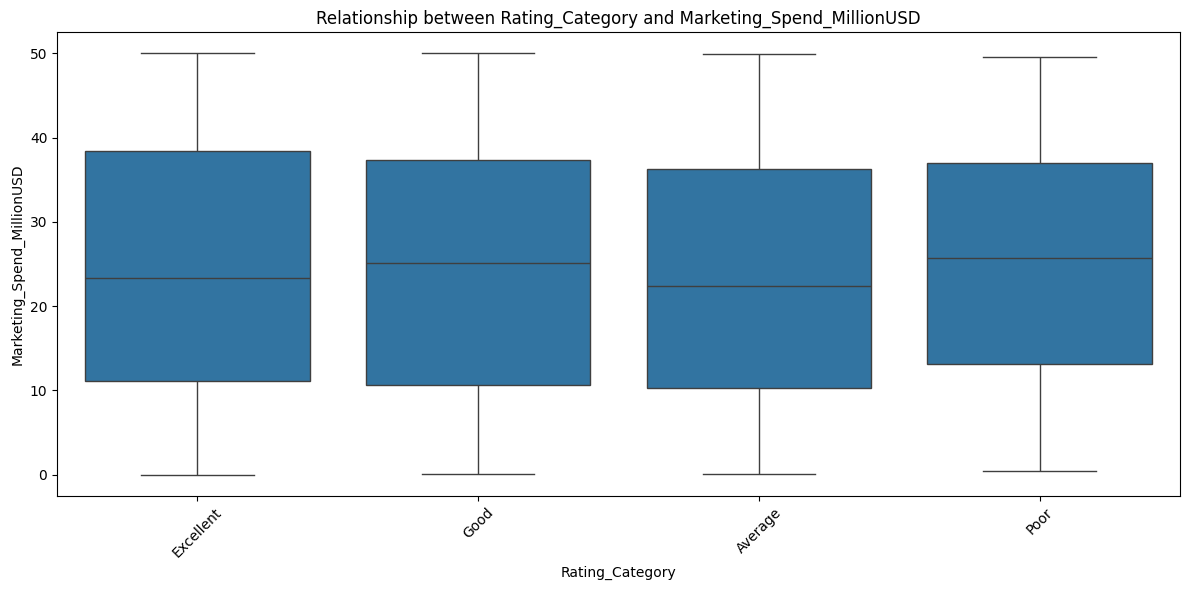

<Figure size 1200x800 with 0 Axes>

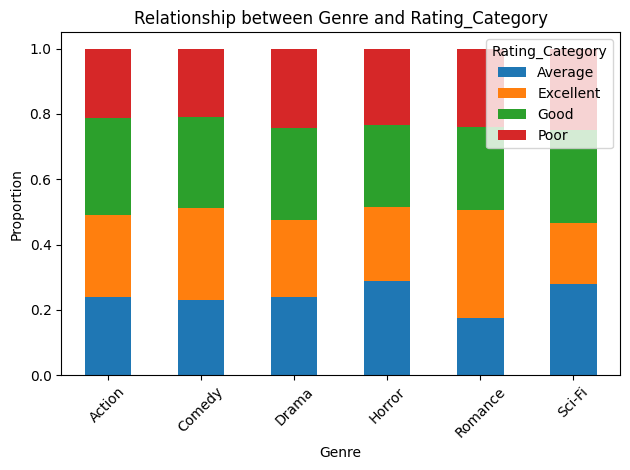

<Figure size 1200x800 with 0 Axes>

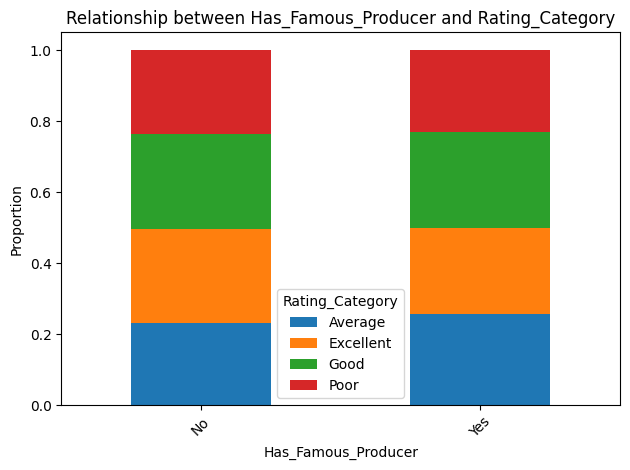

<Figure size 1200x800 with 0 Axes>

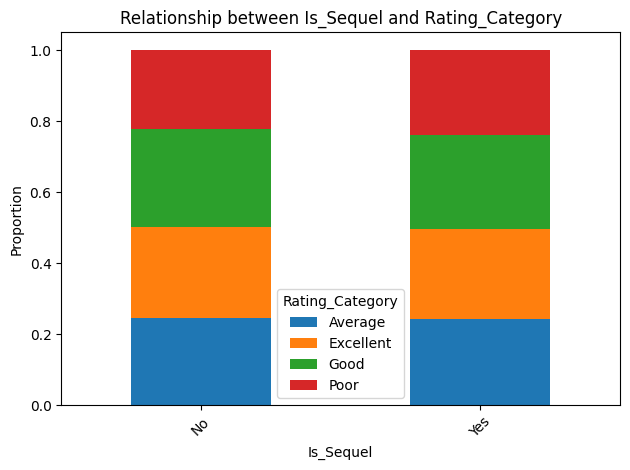

In [20]:
# Analyze relationship between categorical and numerical variables
print("\nAnalyzing relationship between categorical and target variables:")
if 'Rating_Category' in df.columns:
    target_col = 'Rating_Category'

    # For each numerical feature, analyze its relationship with the target
    for col in numeric_cols:
        plt.figure(figsize=(12, 6))
        sns.boxplot(x=target_col, y=col, data=df)
        plt.title(f'Relationship between {target_col} and {col}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.savefig(f'{target_col}_vs_{col}.png')

    # For each categorical feature, analyze its relationship with the target
    for col in categorical_cols:
        if col != target_col:
            plt.figure(figsize=(12, 8))
            cross_tab = pd.crosstab(df[col], df[target_col], normalize='index')
            cross_tab.plot(kind='bar', stacked=True)
            plt.title(f'Relationship between {col} and {target_col}')
            plt.xlabel(col)
            plt.ylabel('Proportion')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.savefig(f'{col}_vs_{target_col}.png')

Class Imbalance Findings

In [21]:
class_counts = df['Rating_Category'].value_counts()
class_percentages = df['Rating_Category'].value_counts(normalize=True) * 100

print("Class distribution in Rating_Category:")
print(class_counts)
print("\nClass percentages:")
for class_name, percentage in class_percentages.items():
    print(f"{class_name}: {percentage:.2f}%")

n_classes = len(class_counts)
max_count = class_counts.max()
min_count = class_counts.min()
imbalance_ratio = max_count / min_count

print(f"\nNumber of classes: {n_classes}")
print(f"Most frequent class: {class_counts.idxmax()} with {max_count} instances")
print(f"Least frequent class: {class_counts.idxmin()} with {min_count} instances")
print(f"Imbalance ratio (max/min): {imbalance_ratio:.2f}")

Class distribution in Rating_Category:
Rating_Category
Good         324
Excellent    304
Average      294
Poor         278
Name: count, dtype: int64

Class percentages:
Good: 27.00%
Excellent: 25.33%
Average: 24.50%
Poor: 23.17%

Number of classes: 4
Most frequent class: Good with 324 instances
Least frequent class: Poor with 278 instances
Imbalance ratio (max/min): 1.17


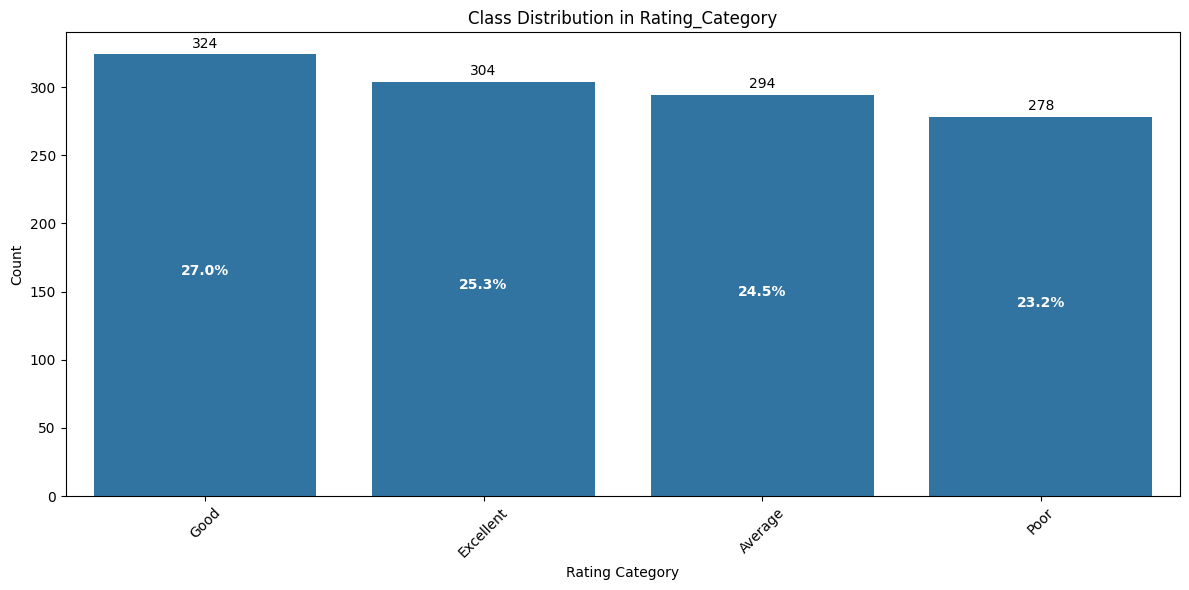


Class distribution is relatively balanced.


In [22]:
plt.figure(figsize=(12, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Class Distribution in Rating_Category')
plt.xlabel('Rating Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
for i, count in enumerate(class_counts.values):
    plt.text(i, count + 5, str(count), ha='center')

for i, (count, percentage) in enumerate(zip(class_counts.values, class_percentages.values)):
    plt.text(i, count/2, f"{percentage:.1f}%", ha='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()

if imbalance_ratio > 10:
    print("\nSEVERE CLASS IMBALANCE DETECTED!")
elif imbalance_ratio > 3:
    print("\nMODERATE CLASS IMBALANCE DETECTED!")
    print("Consider using class weights or evaluation metrics like F1-score.")
else:
    print("\nClass distribution is relatively balanced.")

In [23]:
print("\nCorrelation Matrix for Numerical Features:")
correlation_matrix = df[numeric_cols].corr()
print(correlation_matrix)


Correlation Matrix for Numerical Features:
                            Director_Popularity  Budget_MillionUSD  \
Director_Popularity                    1.000000           0.008099   
Budget_MillionUSD                      0.008099           1.000000   
Runtime_Minutes                       -0.008573          -0.015807   
Release_Year                           0.021481           0.041227   
Num_Main_Actors                       -0.000977           0.025312   
Avg_Actor_Popularity                   0.031357           0.005023   
Num_Awards_Won                        -0.016872          -0.060052   
Marketing_Spend_MillionUSD            -0.019552          -0.003116   

                            Runtime_Minutes  Release_Year  Num_Main_Actors  \
Director_Popularity               -0.008573      0.021481        -0.000977   
Budget_MillionUSD                 -0.015807      0.041227         0.025312   
Runtime_Minutes                    1.000000      0.047818         0.030211   
Release_Year 

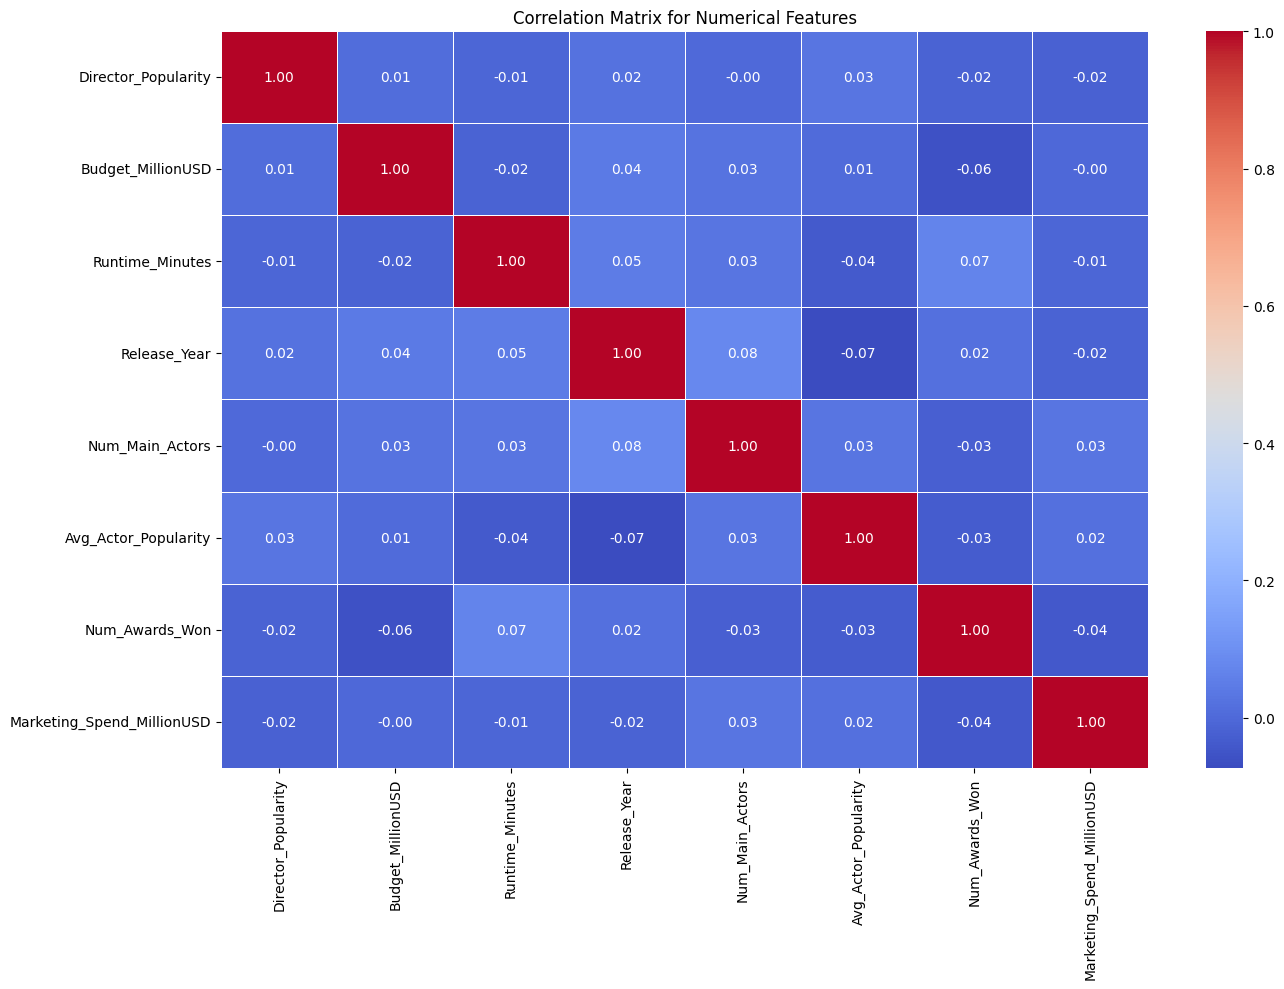

In [24]:
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for Numerical Features')
plt.tight_layout()
plt.savefig('correlation_matrix.png')

# Data Preprocessing

Checking null cells number

In [ ]:
df.isnull().sum()

,0
Genre,129
Director_Popularity,133
Budget_MillionUSD,104
Runtime_Minutes,126
Release_Year,112
Num_Main_Actors,125
Avg_Actor_Popularity,134
Has_Famous_Producer,129
Num_Awards_Won,139
Marketing_Spend_MillionUSD,111


In [ ]:
df.shape

(1200, 12)

In [ ]:
# df.dropna(inplace=True)
# df.shape

In [ ]:
genre_mapping = {
    'Action': 0,
    'Comedy': 1,
    'Drama': 2,
    'Horror': 3,
    'Romance': 4,
    'Sci-Fi': 5
}

sequel_mapping = {
    'No': 0,
    'Yes': 1
}

producer_mapping = {
    'No': 0,
    'Yes': 1
}

rating_mapping = {
    'Average': 0,
    'Excellent': 1,
    'Good': 2,
    'Poor': 3
}

df['Genre_encoded'] = df['Genre'].map(genre_mapping)
df['Has_Famous_Producer_encoded'] = df['Has_Famous_Producer'].map(producer_mapping)
df['Rating_Category_encoded'] = df['Rating_Category'].map(rating_mapping)
df['Is_Sequel_encoded'] = df['Is_Sequel'].map(sequel_mapping)

df['Genre'] = df['Genre_encoded']
df['Has_Famous_Producer'] = df['Has_Famous_Producer_encoded']
df['Rating_Category'] = df['Rating_Category_encoded']
df['Is_Sequel'] = df['Is_Sequel_encoded']

df = df.drop(['Genre_encoded', 'Has_Famous_Producer_encoded', 'Rating_Category_encoded','Is_Sequel_encoded'], axis=1)

In [ ]:
df.head(5)

,Genre,Director_Popularity,Budget_MillionUSD,Runtime_Minutes,Release_Year,Num_Main_Actors,Avg_Actor_Popularity,Has_Famous_Producer,Num_Awards_Won,Marketing_Spend_MillionUSD,Is_Sequel,Rating_Category
0,5.0,5.80,134.63,141.0,NaN,1.0,2.72,0.0,9.0,25.48,0.0,1
1,0.0,2.27,220.47,98.0,2006.0,1.0,3.46,1.0,17.0,9.13,1.0,1
2,3.0,1.23,52.79,160.0,2010.0,2.0,NaN,NaN,43.0,6.16,0.0,1
3,0.0,8.17,86.41,153.0,2022.0,4.0,5.21,NaN,7.0,2.99,0.0,2
4,4.0,6.40,259.57,134.0,1986.0,1.0,8.72,1.0,25.0,0.89,0.0,1


In [ ]:
df.dtypes

,0
Genre,float64
Director_Popularity,float64
Budget_MillionUSD,float64
Runtime_Minutes,float64
Release_Year,float64
Num_Main_Actors,float64
Avg_Actor_Popularity,float64
Has_Famous_Producer,float64
Num_Awards_Won,float64
Marketing_Spend_MillionUSD,float64


In [ ]:
for column in df.columns:
    if df[column].dtype in ['float64', 'int64']:
        column_mean = df[column].median()
        df[column].fillna(column_mean, inplace=True)


print("\nNull values after replacement:")
df.isnull().sum()


Null values after replacement:


,0
Genre,0
Director_Popularity,0
Budget_MillionUSD,0
Runtime_Minutes,0
Release_Year,0
Num_Main_Actors,0
Avg_Actor_Popularity,0
Has_Famous_Producer,0
Num_Awards_Won,0
Marketing_Spend_MillionUSD,0


In [ ]:
df.head(5)

,Genre,Director_Popularity,Budget_MillionUSD,Runtime_Minutes,Release_Year,Num_Main_Actors,Avg_Actor_Popularity,Has_Famous_Producer,Num_Awards_Won,Marketing_Spend_MillionUSD,Is_Sequel,Rating_Category
0,5.0,5.80,134.63,141.0,2002.0,1.0,2.72,0.0,9.0,25.48,0.0,1
1,0.0,2.27,220.47,98.0,2006.0,1.0,3.46,1.0,17.0,9.13,1.0,1
2,3.0,1.23,52.79,160.0,2010.0,2.0,5.47,0.0,43.0,6.16,0.0,1
3,0.0,8.17,86.41,153.0,2022.0,4.0,5.21,0.0,7.0,2.99,0.0,2
4,4.0,6.40,259.57,134.0,1986.0,1.0,8.72,1.0,25.0,0.89,0.0,1


# Data Preprocessing NEW

In [54]:
# Display basic information
print("Dataset shape:", df.shape)

print("\nMissing values per column:")
print(df.isnull().sum())

Dataset shape: (1200, 12)

Missing values per column:
Genre                         129
Director_Popularity           133
Budget_MillionUSD             104
Runtime_Minutes               126
Release_Year                  112
Num_Main_Actors               125
Avg_Actor_Popularity          134
Has_Famous_Producer           129
Num_Awards_Won                139
Marketing_Spend_MillionUSD    111
Is_Sequel                     117
Rating_Category                 0
dtype: int64


In [55]:
#Define numerical and categorical features
numerical_features = [
    'Director_Popularity', 'Budget_MillionUSD', 'Runtime_Minutes',
    'Release_Year', 'Num_Main_Actors', 'Avg_Actor_Popularity',
    'Num_Awards_Won', 'Marketing_Spend_MillionUSD'
]

categorical_features = ['Genre', 'Has_Famous_Producer', 'Is_Sequel']

In [56]:
# Fill missing values for categorical features with mode
df['Genre'] = df['Genre'].fillna(df['Genre'].mode()[0])
df['Has_Famous_Producer'] = df['Has_Famous_Producer'].fillna(df['Has_Famous_Producer'].mode()[0])
df['Is_Sequel'] = df['Is_Sequel'].fillna(df['Is_Sequel'].mode()[0])

In [57]:
# Using median for numeric columns
df['Director_Popularity'] = df['Director_Popularity'].fillna(df['Director_Popularity'].median())
df['Budget_MillionUSD'] = df['Budget_MillionUSD'].fillna(df['Budget_MillionUSD'].median())
df['Runtime_Minutes'] = df['Runtime_Minutes'].fillna(df['Runtime_Minutes'].median())
df['Release_Year'] = df['Release_Year'].fillna(df['Release_Year'].median())
df['Num_Main_Actors'] = df['Num_Main_Actors'].fillna(df['Num_Main_Actors'].median())
df['Avg_Actor_Popularity'] = df['Avg_Actor_Popularity'].fillna(df['Avg_Actor_Popularity'].median())
df['Num_Awards_Won'] = df['Num_Awards_Won'].fillna(df['Num_Awards_Won'].median())
df['Marketing_Spend_MillionUSD'] = df['Marketing_Spend_MillionUSD'].fillna(df['Marketing_Spend_MillionUSD'].median())


In [58]:
#Check if missing values have been filled
print("\nMissing values after imputation:")
print(df.isnull().sum())


Missing values after imputation:
Genre                         0
Director_Popularity           0
Budget_MillionUSD             0
Runtime_Minutes               0
Release_Year                  0
Num_Main_Actors               0
Avg_Actor_Popularity          0
Has_Famous_Producer           0
Num_Awards_Won                0
Marketing_Spend_MillionUSD    0
Is_Sequel                     0
Rating_Category               0
dtype: int64


In [59]:
# Create preprocessing pipelines
# Preprocessing for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessors
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

In [60]:
# Encode all categorical features with LabelEncoder
le = LabelEncoder()
df['Genre'] = le.fit_transform(df['Genre'])
df['Has_Famous_Producer'] = le.fit_transform(df['Has_Famous_Producer'])
df['Is_Sequel'] = le.fit_transform(df['Is_Sequel'])
df['Rating_Category'] = le.fit_transform(df['Rating_Category'])

print("\nDataset after encoding:")
print(df.head(5))


Dataset after encoding:
   Genre  Director_Popularity  Budget_MillionUSD  Runtime_Minutes  \
0      5                 5.80             134.63            141.0   
1      0                 2.27             220.47             98.0   
2      3                 1.23              52.79            160.0   
3      0                 8.17              86.41            153.0   
4      4                 6.40             259.57            134.0   

   Release_Year  Num_Main_Actors  Avg_Actor_Popularity  Has_Famous_Producer  \
0        2002.0              1.0                  2.72                    0   
1        2006.0              1.0                  3.46                    1   
2        2010.0              2.0                  5.47                    0   
3        2022.0              4.0                  5.21                    0   
4        1986.0              1.0                  8.72                    1   

   Num_Awards_Won  Marketing_Spend_MillionUSD  Is_Sequel  Rating_Category  
0        

In [61]:
# Encode all categorical features with LabelEncoder
le = LabelEncoder()
df['Genre'] = le.fit_transform(df['Genre'])
df['Has_Famous_Producer'] = le.fit_transform(df['Has_Famous_Producer'])
df['Is_Sequel'] = le.fit_transform(df['Is_Sequel'])
df['Rating_Category'] = le.fit_transform(df['Rating_Category'])

# Prediction of Movie Rating Category

Data Split and Variable Fixing

In [67]:
X = df.drop(['Rating_Category'], axis=1)
y = df['Rating_Category']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [ ]:
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [ ]:
model_results = {}
def evaluate_model(model_name, model, X_train, X_test, y_train, y_test, is_neural_net=False):
    if not is_neural_net:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    else:
        y_pred = np.argmax(model.predict(X_test), axis=1)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")

    print(f"\n{model_name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score (weighted): {f1:.4f}")
    print(f"\n{model_name} Classification Report:")
    print(classification_report(y_test, y_pred,
                              target_names=list(rating_mapping.keys())))

    return accuracy, f1, y_pred

# Models


In [69]:
# Create pipelines for Random Forest and Logistic Regression
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# Add Naive Bayes, KNN, and Decision Tree pipelines
nb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())
])

dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])

# Add Neural Network pipeline
nn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42))
])

In [70]:
# Train all models
print("Training models...")
rf_pipeline.fit(X_train, y_train)
lr_pipeline.fit(X_train, y_train)
nb_pipeline.fit(X_train, y_train)
dt_pipeline.fit(X_train, y_train)
knn_pipeline.fit(X_train, y_train)
nn_pipeline.fit(X_train, y_train)

Training models...


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Director_Popularity',
                                                   'Budget_MillionUSD',
                                                   'Runtime_Minutes',
                                                   'Release_Year',
                                                   'Num_Main_Actors',
                                                   'Avg_Actor_Popularity',
                                                   'Num_Awards_Won',
                                                   'Marketing_Spend_MillionUSD']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Genre',
                                                   'Has_Famous_Producer',
                                                   'Is_Sequel'])])),
                ('classifier', MLPClassifier(max_iter=300, random_state=42))])

In [71]:
# Make predictions
rf_preds = rf_pipeline.predict(X_test)
lr_preds = lr_pipeline.predict(X_test)
nb_preds = nb_pipeline.predict(X_test)
dt_preds = dt_pipeline.predict(X_test)
knn_preds = knn_pipeline.predict(X_test)
nn_preds = nn_pipeline.predict(X_test)

In [72]:
# Calculate accuracy scores
rf_acc = accuracy_score(y_test, rf_preds)
lr_acc = accuracy_score(y_test, lr_preds)
nb_acc = accuracy_score(y_test, nb_preds)
dt_acc = accuracy_score(y_test, dt_preds)
knn_acc = accuracy_score(y_test, knn_preds)
nn_acc = accuracy_score(y_test, nn_preds)

In [73]:
# Print accuracy scores
print("\nAccuracy Scores:")
print("Random Forest Accuracy: {:.2f}%".format(rf_acc * 100))
print("Logistic Regression Accuracy: {:.2f}%".format(lr_acc * 100))
print("Naive Bayes Accuracy: {:.2f}%".format(nb_acc * 100))
print("Decision Tree Accuracy: {:.2f}%".format(dt_acc * 100))
print("K-Nearest Neighbors Accuracy: {:.2f}%".format(knn_acc * 100))
print("Neural Network Accuracy: {:.2f}%".format(nn_acc * 100))


Accuracy Scores:
Random Forest Accuracy: 23.89%
Logistic Regression Accuracy: 21.67%
Naive Bayes Accuracy: 23.89%
Decision Tree Accuracy: 26.11%
K-Nearest Neighbors Accuracy: 25.56%
Neural Network Accuracy: 24.72%


# KNN

In [ ]:
k_values = range(1, 21)
k_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    k_accuracies.append(accuracy)
    print(f"K = {k}, Accuracy = {accuracy:.4f}")

K = 1, Accuracy = 0.2639
K = 2, Accuracy = 0.2278
K = 3, Accuracy = 0.2278
K = 4, Accuracy = 0.2222
K = 5, Accuracy = 0.2417
K = 6, Accuracy = 0.2222
K = 7, Accuracy = 0.2222
K = 8, Accuracy = 0.2056
K = 9, Accuracy = 0.2056
K = 10, Accuracy = 0.2278
K = 11, Accuracy = 0.2361
K = 12, Accuracy = 0.2333
K = 13, Accuracy = 0.2500
K = 14, Accuracy = 0.2306
K = 15, Accuracy = 0.2361
K = 16, Accuracy = 0.2389
K = 17, Accuracy = 0.2361
K = 18, Accuracy = 0.2389
K = 19, Accuracy = 0.2333
K = 20, Accuracy = 0.2306


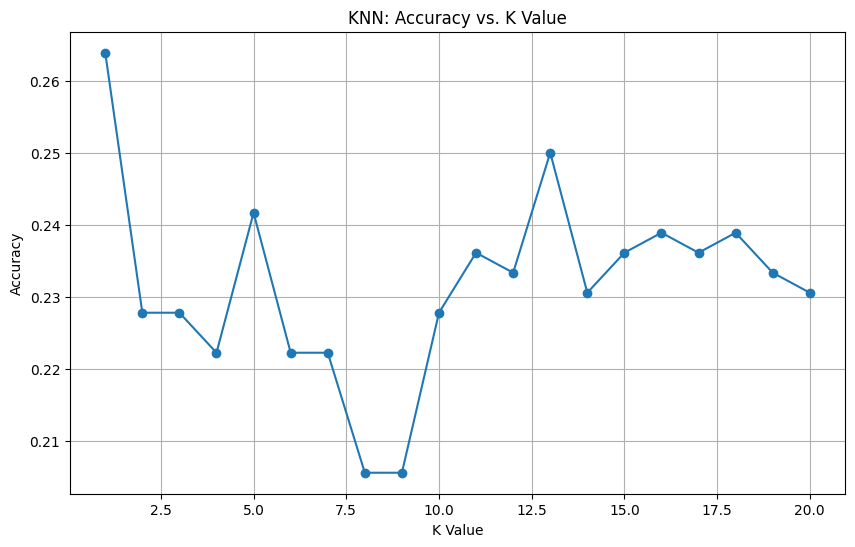

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, k_accuracies, marker='o')
plt.title('KNN: Accuracy vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [ ]:
best_k = k_values[np.argmax(k_accuracies)]
print(f"Best K value: {best_k} with Accuracy: {max(k_accuracies):.4f}")

Best K value: 1 with Accuracy: 0.2639


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_accuracy, knn_f1, knn_pred = evaluate_model("KNN", knn_model, X_train, X_test, y_train, y_test)
model_results['KNN'] = {'accuracy': knn_accuracy, 'f1': knn_f1}


KNN Results:
Accuracy: 0.2639
F1 Score (weighted): 0.2627

KNN Classification Report:
              precision    recall  f1-score   support

     Average       0.24      0.22      0.23        88
   Excellent       0.30      0.33      0.31        91
        Good       0.26      0.27      0.26        97
        Poor       0.25      0.24      0.24        84

    accuracy                           0.26       360
   macro avg       0.26      0.26      0.26       360
weighted avg       0.26      0.26      0.26       360



<Figure size 1000x800 with 0 Axes>

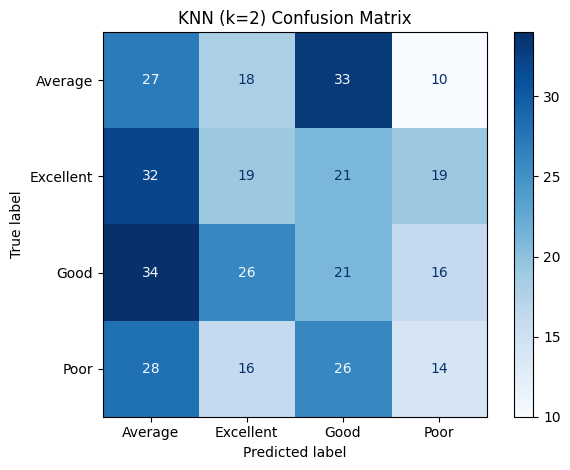

In [ ]:
# Create and display confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                           display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.title(f'KNN (k={best_k}) Confusion Matrix')
plt.tight_layout()
plt.show()

# Decision Tree


Decision Tree Feature Importance:
                       Feature  Importance
6               Num_Awards_Won    0.138669
0          Director_Popularity    0.125926
7   Marketing_Spend_MillionUSD    0.119987
1            Budget_MillionUSD    0.117511
2              Runtime_Minutes    0.105661
5         Avg_Actor_Popularity    0.094211
3                 Release_Year    0.092562
4              Num_Main_Actors    0.067710
11                Genre_Horror    0.019401
10                 Genre_Drama    0.017040
8                 Genre_Action    0.016329
17                  Sequel_Yes    0.014400
14                 Producer_No    0.013807
16                   Sequel_No    0.013717
15                Producer_Yes    0.012479
13                Genre_Sci-Fi    0.011635
9                 Genre_Comedy    0.011209
12               Genre_Romance    0.007748


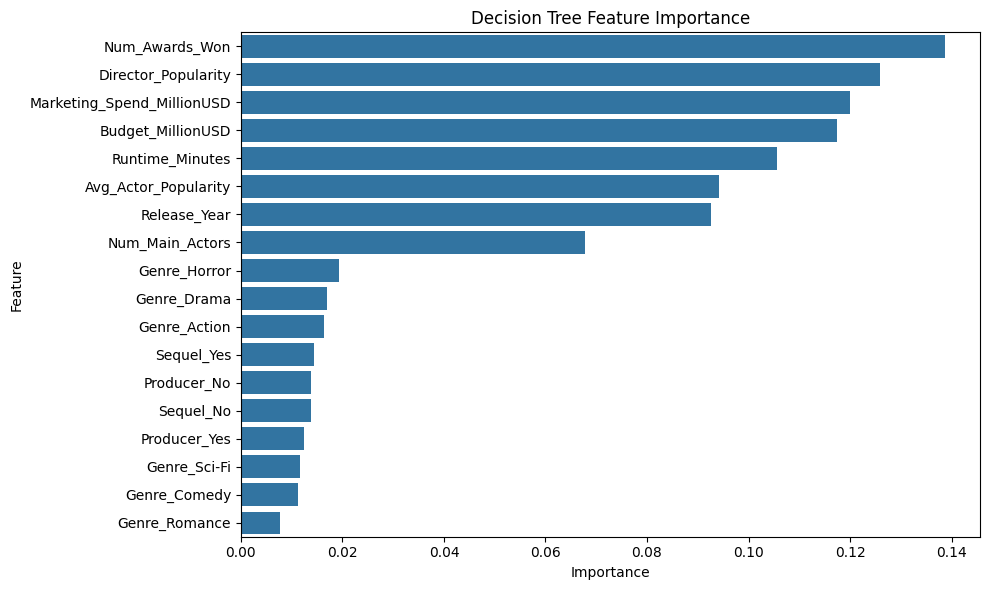

In [ ]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nDecision Tree Feature Importance:")
print(feature_importance)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Decision Tree Feature Importance')
plt.tight_layout()
plt.show()

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_accuracy, dt_f1, dt_pred = evaluate_model("Decision Tree", dt_model, X_train, X_test, y_train, y_test)


Decision Tree Results:
Accuracy: 0.2556
F1 Score (weighted): 0.2560

Decision Tree Classification Report:
              precision    recall  f1-score   support

     Average       0.21      0.22      0.21        88
   Excellent       0.30      0.30      0.30        91
        Good       0.28      0.27      0.28        97
        Poor       0.23      0.24      0.23        84

    accuracy                           0.26       360
   macro avg       0.26      0.25      0.25       360
weighted avg       0.26      0.26      0.26       360



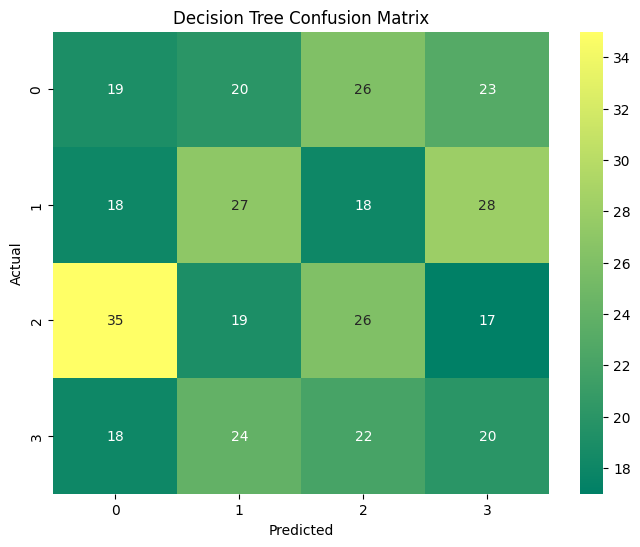

In [ ]:
y_act = y_test
y_pred = dt_model.predict(X_test)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_act, y_pred), annot=True, cmap='summer')
plt.title('Decision Tree Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Naive Bayes

In [ ]:
nb_model = GaussianNB()
nb_accuracy, nb_f1, nb_pred = evaluate_model("Naive Bayes", nb_model, X_train, X_test, y_train, y_test)
model_results['Naive Bayes'] = {'accuracy': nb_accuracy, 'f1': nb_f1}


Naive Bayes Results:
Accuracy: 0.2333
F1 Score (weighted): 0.2258

Naive Bayes Classification Report:
              precision    recall  f1-score   support

     Average       0.23      0.33      0.27        88
   Excellent       0.27      0.31      0.29        91
        Good       0.18      0.12      0.15        97
        Poor       0.24      0.18      0.21        84

    accuracy                           0.23       360
   macro avg       0.23      0.23      0.23       360
weighted avg       0.23      0.23      0.23       360



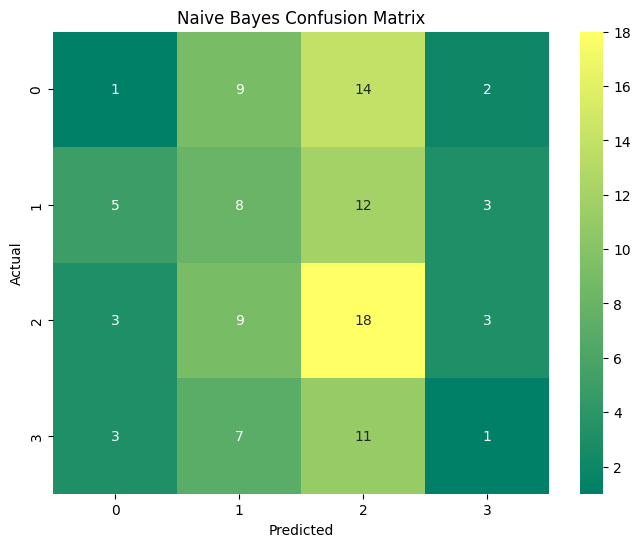

              precision    recall  f1-score   support

           0       0.08      0.04      0.05        26
           1       0.24      0.29      0.26        28
           2       0.33      0.55      0.41        33
           3       0.11      0.05      0.06        22

    accuracy                           0.26       109
   macro avg       0.19      0.23      0.20       109
weighted avg       0.20      0.26      0.22       109

Naive Bayes F1 Score (weighted): 0.2168


In [ ]:
y_act = y_test
y_pred = nb_model.predict(X_test_scaled)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_act, y_pred), annot=True, cmap='summer')
plt.title('Naive Bayes Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
print(classification_report(y_act, y_pred))
f1_nb = f1_score(y_test, y_pred, average="weighted")
print(f"Naive Bayes F1 Score (weighted): {f1_nb:.4f}")

# Neural Networks

In [ ]:
n_features = X_train_scaled.shape[1]
n_classes = len(np.unique(y_train))

In [ ]:
def create_nn_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(n_features,)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(n_classes, activation='softmax')
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

In [ ]:
nn_model = create_nn_model()
print("Neural Network Architecture:")
nn_model.summary()

Neural Network Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,364 (44.39 KB)

 Trainable params: 11,364 (44.39 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
print("\nTraining the Neural Network:")
history = nn_model.fit(
    X_train_scaled,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


Training the Neural Network:
Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 161ms/step - accuracy: 0.2474 - loss: 1.3955 - val_accuracy: 0.3333 - val_loss: 1.3834
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3065 - loss: 1.3738 - val_accuracy: 0.3137 - val_loss: 1.3792
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.2370 - loss: 1.3808 - val_accuracy: 0.2941 - val_loss: 1.3822
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3450 - loss: 1.3471 - val_accuracy: 0.2941 - val_loss: 1.3845
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3762 - loss: 1.3544 - val_accuracy: 0.2941 - val_loss: 1.3882
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3325 - loss: 1.3514 - val_accuracy: 0.2549 - val_loss: 1.3933
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3172 - loss: 1.3628 - val_accuracy: 0.2745 - val_loss: 1.3962
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3197 - loss: 1.3649 - val_accur

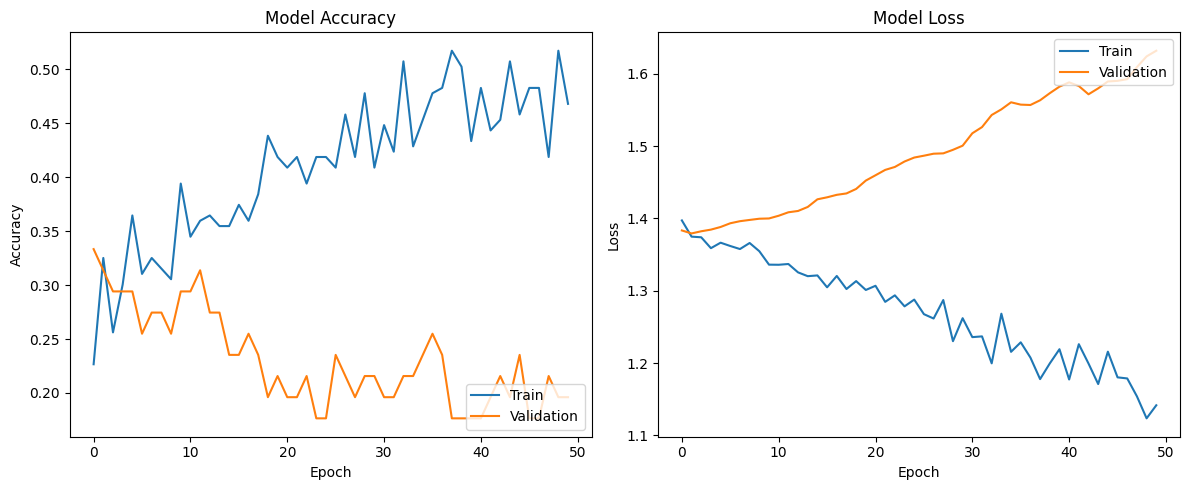

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

NN Model Evaluation

In [ ]:
y_act = y_test
y_pred = np.argmax(nn_model.predict(X_test_scaled), axis=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


In [ ]:
accuracy = accuracy_score(y_act, y_pred)
f1_nn = f1_score(y_act, y_pred, average="weighted")
print(f"Neural Network Accuracy: {accuracy:.4f}")
print(f"Neural Network F1 Score (weighted): {f1_nn:.4f}")

Neural Network Accuracy: 0.2569
Neural Network F1 Score (weighted): 0.2520


In [ ]:
print("\nClassification Report:")
print(classification_report(y_act, y_pred,
                          target_names=list(rating_mapping.keys())))


Classification Report:
              precision    recall  f1-score   support

     Average       0.23      0.19      0.21        26
   Excellent       0.25      0.21      0.23        28
        Good       0.35      0.42      0.38        33
        Poor       0.13      0.14      0.13        22

    accuracy                           0.26       109
   macro avg       0.24      0.24      0.24       109
weighted avg       0.25      0.26      0.25       109



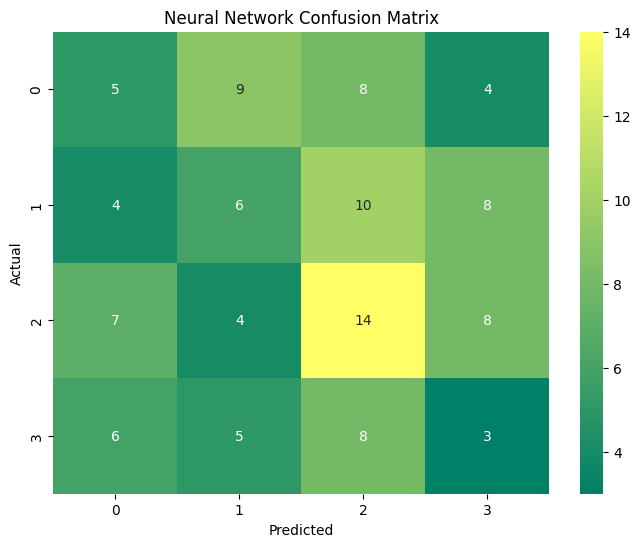

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_act, y_pred), annot=True, cmap='summer')
plt.title('Neural Network Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Model Comparison AUC Score & ROC Curve

In [ ]:
model_results = {
    'KNN': {'accuracy': accuracy_score(y_test, knn_model.predict(X_test_scaled)),
            'f1': knn_f1},
    'Decision Tree': {'accuracy': accuracy_score(y_test, dt_model.predict(X_test_scaled)),
                      'f1': dt_f1},
    'Naive Bayes': {'accuracy': accuracy_score(y_test, nb_model.predict(X_test_scaled)),
                   'f1': nb_f1},
    'Neural Network': {'accuracy': accuracy_score(y_test, np.argmax(nn_model.predict(X_test_scaled), axis=1)),
                      'f1': f1_nn}
}

comparison_df = pd.DataFrame(model_results).T
comparison_df.columns = ['Accuracy', 'F1 Score']
comparison_df = comparison_df.sort_values('Accuracy', ascending=False)

print("\nModel Performance Comparison:")
print(comparison_df)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

Model Performance Comparison:
                Accuracy  F1 Score
KNN             0.330275  0.324942
Naive Bayes     0.256881  0.216808
Neural Network  0.256881  0.252010
Decision Tree   0.220183  0.217385


<Figure size 1200x600 with 0 Axes>

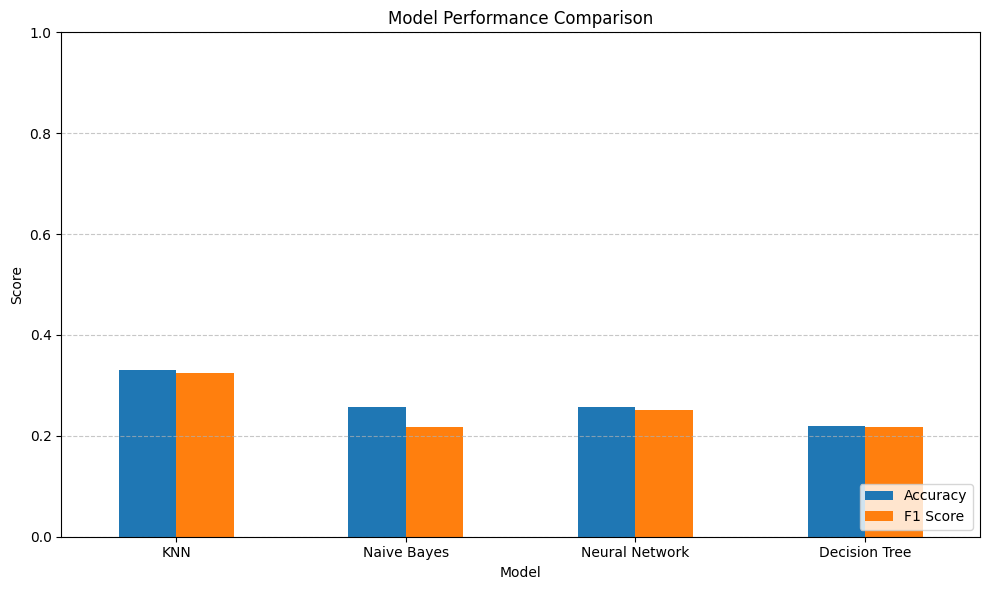

In [ ]:
plt.figure(figsize=(12, 6))
comparison_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xlabel('Model')
plt.ylim(0, 1.0)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [ ]:
def plot_roc_multiclass(models, model_names, X_test_scaled, y_test):
    n_classes = len(np.unique(y_test))
    y_bin = label_binarize(y_test, classes=np.unique(y_test))
    plt.figure(figsize=(12, 10))
    colors = cycle(['blue', 'red', 'green', 'purple'])
    all_auc_scores = {}
    for model, model_name, color in zip(models, model_names, colors):
        if model_name == 'Neural Network':
            y_score = model.predict(X_test_scaled)
        else:
            y_score = model.predict_proba(X_test_scaled)
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        fpr["micro"], tpr["micro"], _ = roc_curve(y_bin.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

        all_auc_scores[model_name] = roc_auc["micro"]

        plt.plot(fpr["micro"], tpr["micro"], color=color, lw=2,
                 label=f'{model_name} (area = {roc_auc["micro"]:.3f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.title('Multi-class ROC Curve for Different Models', fontsize=16)
    plt.legend(loc="lower right", fontsize=12)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
    print("\nAUC Scores (micro-average):")
    for model_name, auc_score in all_auc_scores.items():
        print(f"{model_name}: {auc_score:.4f}")

    return all_auc_scores

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


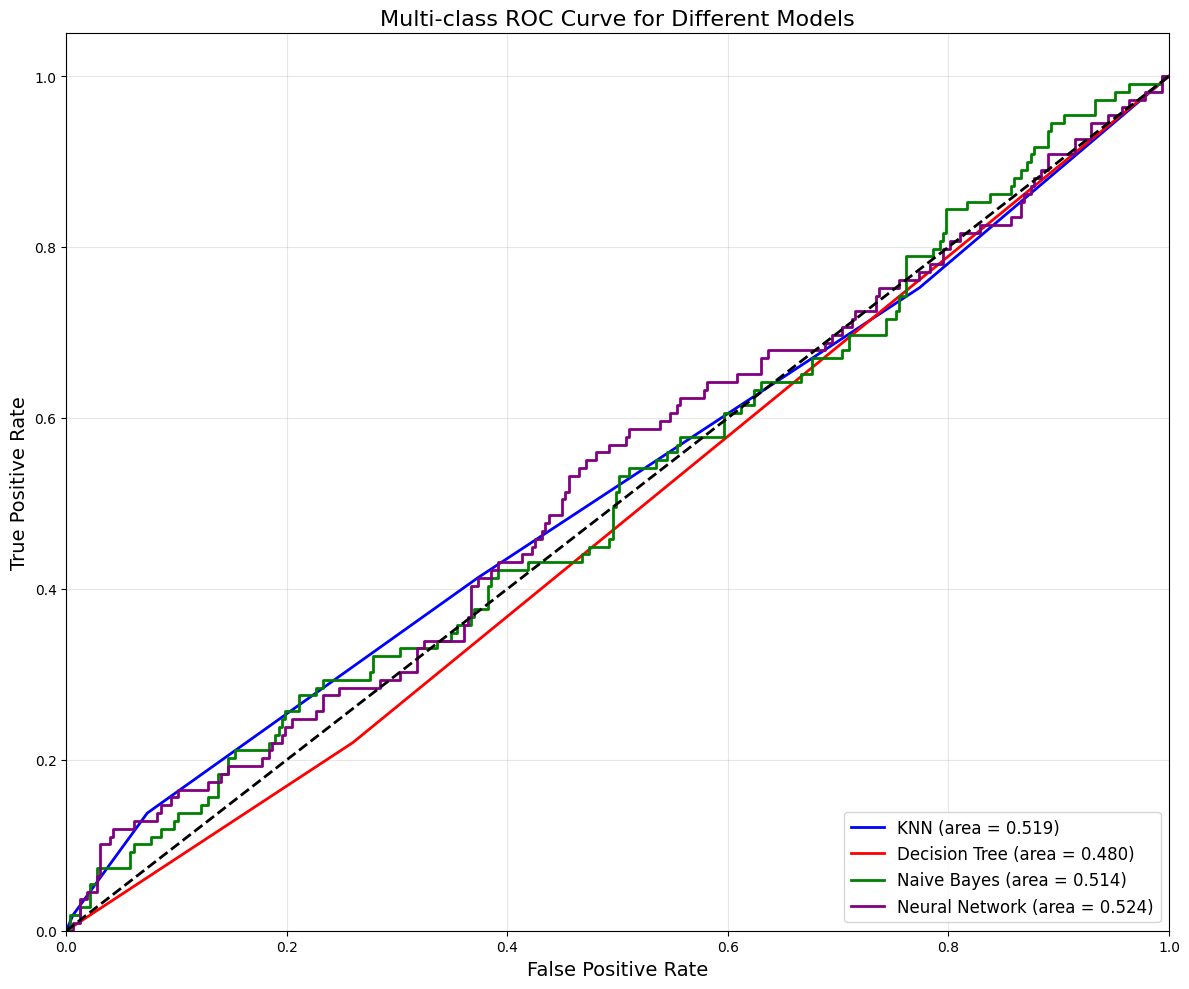


AUC Scores (micro-average):
KNN: 0.5194
Decision Tree: 0.4801
Naive Bayes: 0.5142
Neural Network: 0.5240


In [ ]:
models = [knn_model, dt_model, nb_model, nn_model]
model_names = ['KNN', 'Decision Tree', 'Naive Bayes', 'Neural Network']
auc_scores = plot_roc_multiclass(models, model_names, X_test_scaled, y_test)

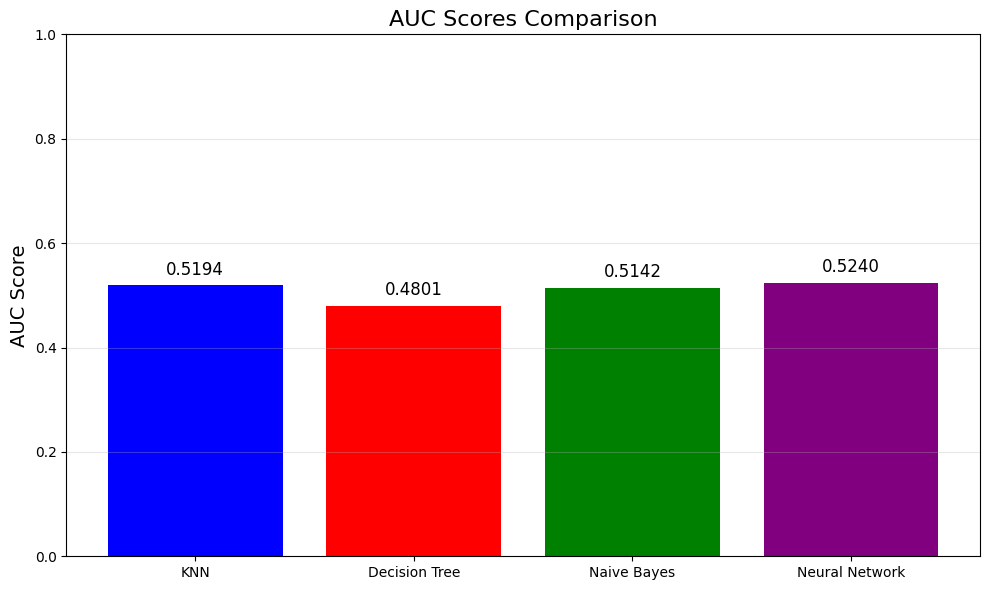

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(auc_scores.keys(), auc_scores.values(), color=['blue', 'red', 'green', 'purple'])
plt.ylim([0, 1])
plt.title('AUC Scores Comparison', fontsize=16)
plt.ylabel('AUC Score', fontsize=14)
plt.grid(axis='y', alpha=0.3)
for i, v in enumerate(auc_scores.values()):
    plt.text(i, v + 0.02, f"{v:.4f}", ha='center', fontsize=12)
plt.tight_layout()
plt.show()